This notebook contains explanation about this first analysis over client metrics dataset...

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [45]:
# Load write dataset
dataset_write_raw = pd.read_csv('datasets/exp_90c/20250930_185638532_w.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
dataset_write_raw = dataset_write_raw.iloc[:3900]

print(dataset_write_raw.shape)
dataset_write_raw.head(5)

(3900, 45)


,timestamp,queries_num,queries_requested,errors_occurred,iter_errors_occurred,average_latency,99_9_latency_percentile,mean_rate,one_minute_rate,five_minute_rate,...,w_min,w_max,w_mean,w_std_dev,w_median,w_75th_percentile,w_95th_percentile,w_98th_percentile,w_99th_percentile,w_99_9th_percentile
0,1759258598,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0
1,1759258598,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0
2,1759258599,9,0,0,0,4,1,0.059497,0.0,0.0,...,4,6,4.444444,0.726483,4.0,5.0,6.00,6.0,6.0,6
3,1759258600,17,0,0,0,4,1,0.111646,0.0,0.0,...,3,6,4.187500,0.655108,4.0,4.0,5.85,6.0,6.0,6
4,1759258601,24,0,0,0,4,1,0.156590,0.0,0.0,...,3,6,4.125000,0.612372,4.0,4.0,5.45,6.0,6.0,6


In [15]:
# Identify columns to normalize (all except the first)
cols_to_normalize = dataset_write_raw.columns[1:]

# Extract the columns to be normalized
dataset_w_to_normalize = dataset_write_raw[cols_to_normalize]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
normalized_data = scaler.fit_transform(dataset_w_to_normalize)

# Create a new DataFrame with the normalized values
dataset_write_norm = pd.DataFrame(normalized_data, columns=cols_to_normalize, index=dataset_write_raw.index)

In [46]:
# Load read dataset
dataset_read_raw = pd.read_csv('datasets/exp_30c/20250930_185638532_r.csv', low_memory=True).apply(pd.to_numeric, errors='coerce').fillna(0)
dataset_read_raw = dataset_read_raw.iloc[:3900]

print(dataset_read_raw.shape)

dataset_read_raw.head(5)

(3900, 45)


,timestamp,queries_num,queries_requested,errors_occurred,iter_errors_occurred,average_latency,99_9_latency_percentile,mean_rate,one_minute_rate,five_minute_rate,...,w_min,w_max,w_mean,w_std_dev,w_median,w_75th_percentile,w_95th_percentile,w_98th_percentile,w_99th_percentile,w_99_9th_percentile
0,1759258598,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0
1,1759258598,0,0,0,0,0,0,0.000000,0.0,0.0,...,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0
2,1759258599,3,0,0,0,27,1,0.032918,0.0,0.0,...,24,31,27.500000,4.949747,27.5,31.000000,31.0,31.0,31.0,31
3,1759258600,5,0,0,0,29,1,0.054269,0.0,0.0,...,24,32,29.800000,3.271085,31.0,31.333333,32.0,32.0,32.0,32
4,1759258601,8,0,0,0,29,1,0.085898,0.0,0.0,...,24,32,29.714286,2.811541,31.0,31.000000,32.0,32.0,32.0,32


In [17]:
# Identify columns to normalize (all except the first)
cols_to_normalize = dataset_read_raw.columns[1:]

# Extract the columns to be normalized
dataset_r_to_normalize = dataset_read_raw[cols_to_normalize]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
normalized_data = scaler.fit_transform(dataset_r_to_normalize)

# Create a new DataFrame with the normalized values
dataset_read_norm = pd.DataFrame(normalized_data, columns=cols_to_normalize, index=dataset_read_raw.index)

# Line plot Timestamp x Snapshots

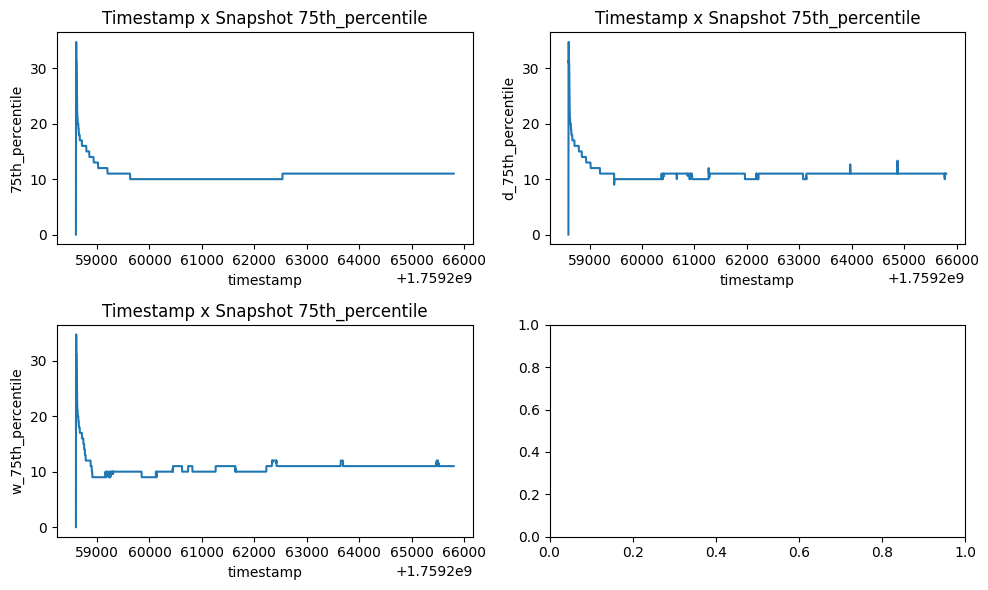

In [25]:
# Plot the responses for different timestamps and percentiles
metric = "75th_percentile"

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.lineplot(x="timestamp", y=metric,
             data=dataset_write_raw, ax=axes[0,0])
axes[0,0].set_title(f"Timestamp x Snapshot {metric}")

sns.lineplot(x="timestamp", y=f"d_{metric}",
             data=dataset_write_raw, ax=axes[0,1])
axes[0,1].set_title(f"Timestamp x Snapshot {metric}")

sns.lineplot(x="timestamp", y=f"w_{metric}",
             data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title(f"Timestamp x Snapshot {metric}")

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# ax = sns.jointplot(x="timestamp", y="snapshot_99_9th_percentile", data=dataset_write_raw, kind="hex", color="#4CB391")
# ax.fig.suptitle("Write - Jointplot", y=1.02)
# plt.show()

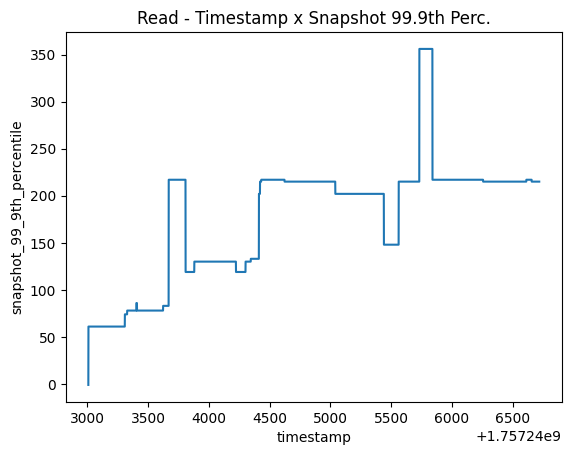

In [12]:
"# Plot the responses for different timestamps and percentiles
ax = sns.lineplot(x="timestamp", y="snapshot_99_9th_percentile",
             data=dataset_read_raw)
ax.set_title("Read - Timestamp x Snapshot 99.9th Perc.")
plt.show()

# KDE for write dataset metrics

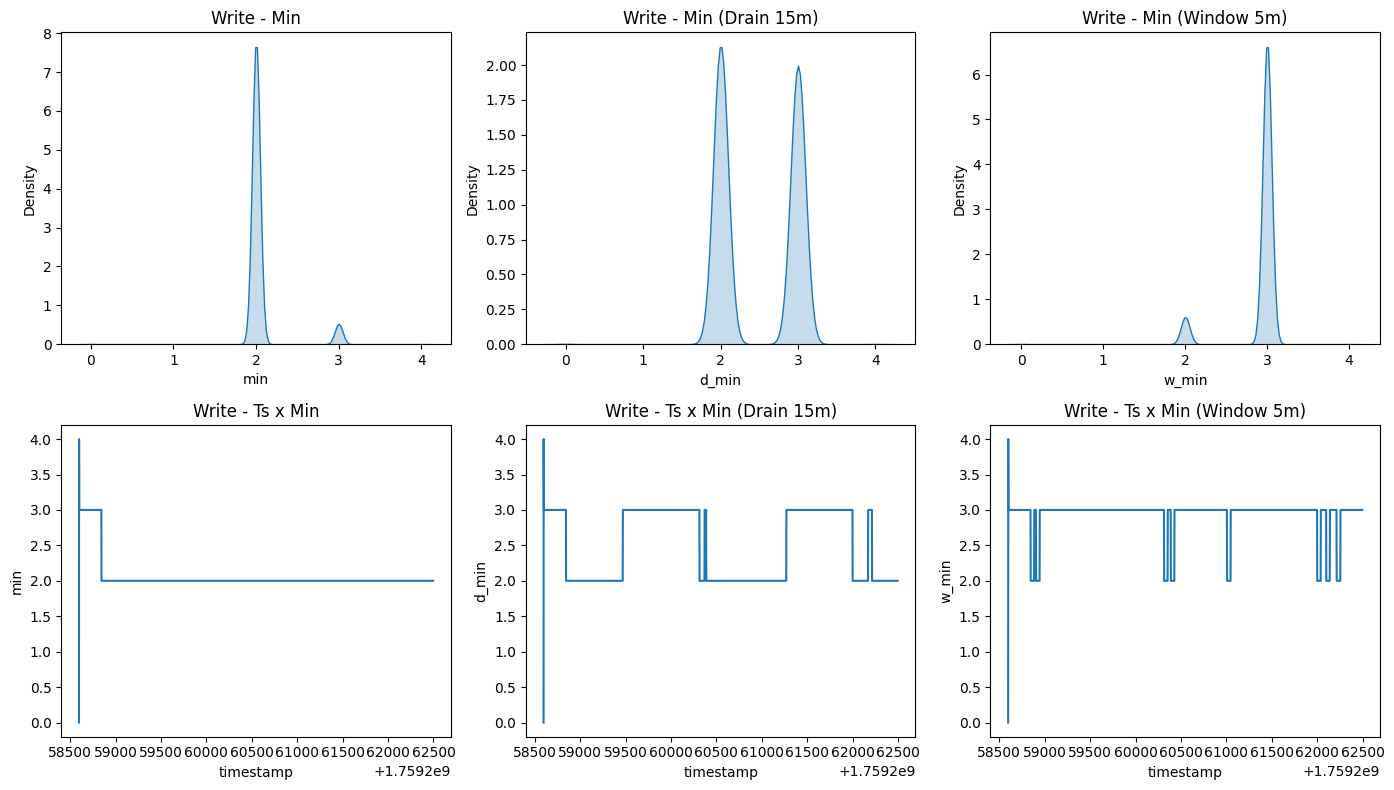

In [47]:
# snapshot_min
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['min'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - Min")

sns.kdeplot(dataset_write_raw['d_min'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - Min (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_min'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - Min (Window 5m)")

sns.lineplot(x="timestamp", y="min", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x Min")

sns.lineplot(x="timestamp", y="d_min", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x Min (Drain 15m)")

sns.lineplot(x="timestamp", y="w_min", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x Min (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_min_mixed.png'))
plt.show()

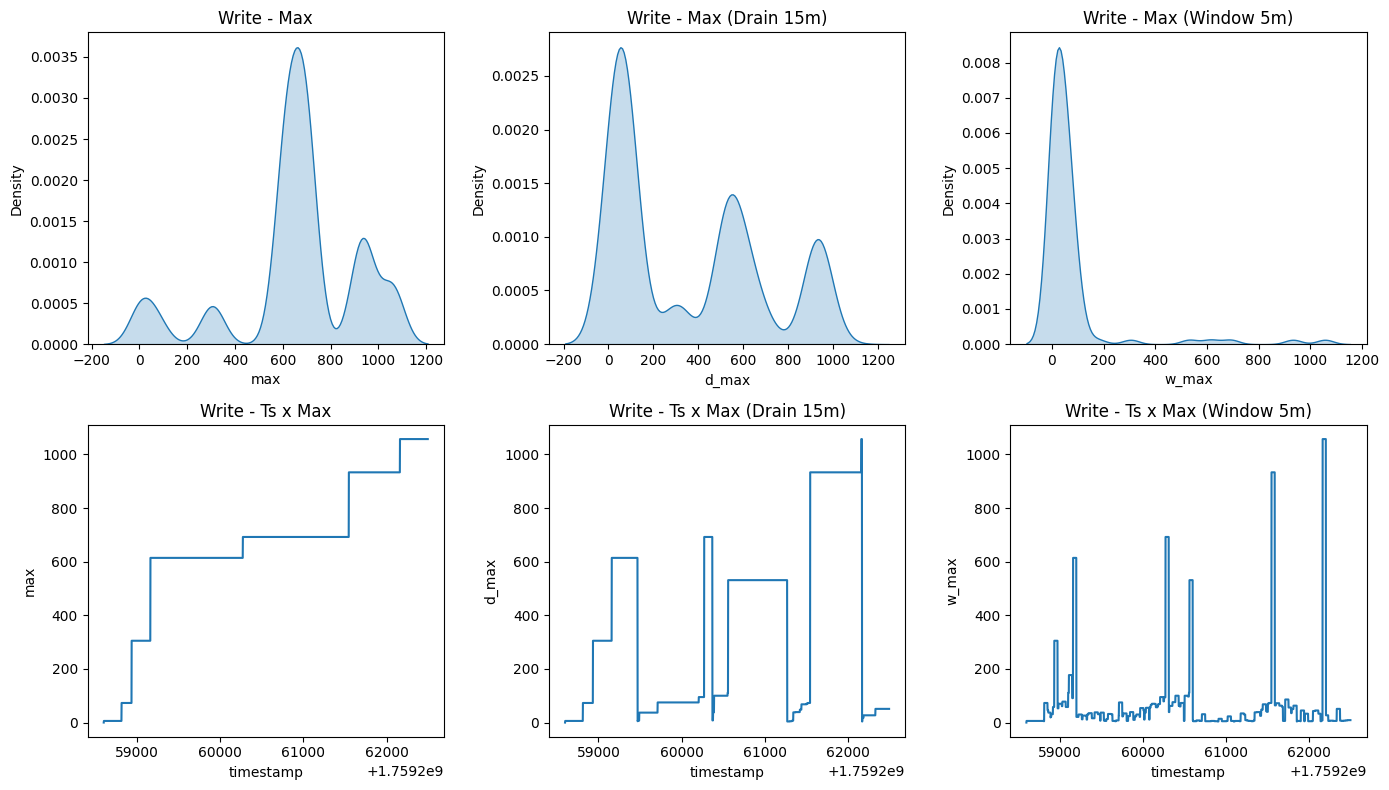

In [48]:
# snapshot_max
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['max'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - Max")

sns.kdeplot(dataset_write_raw['d_max'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - Max (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_max'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - Max (Window 5m)")

sns.lineplot(x="timestamp", y="max", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x Max")

sns.lineplot(x="timestamp", y="d_max", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x Max (Drain 15m)")

sns.lineplot(x="timestamp", y="w_max", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x Max (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_max_mixed.png'))
plt.show()

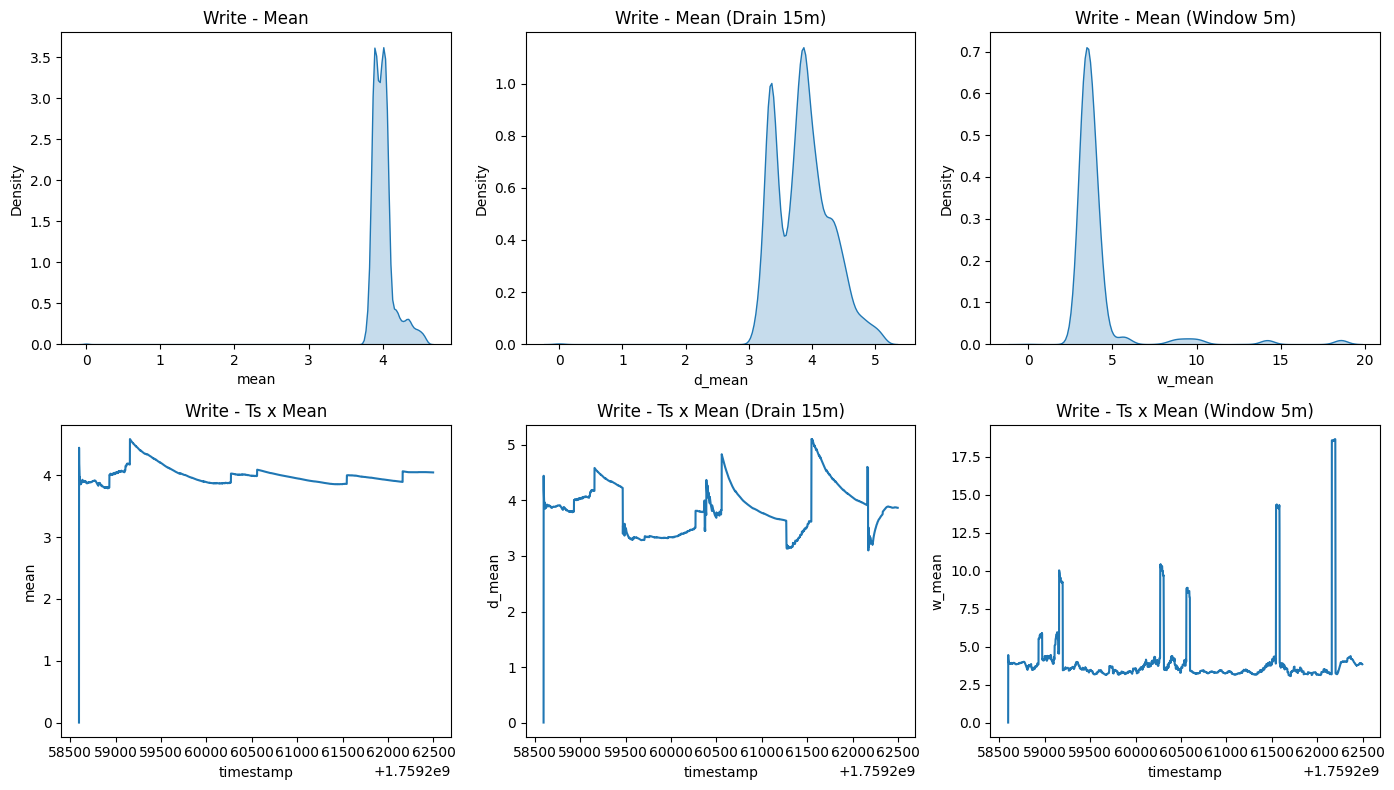

In [49]:
# mean
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['mean'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - Mean")

sns.kdeplot(dataset_write_raw['d_mean'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - Mean (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_mean'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - Mean (Window 5m)")

sns.lineplot(x="timestamp", y="mean", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x Mean")

sns.lineplot(x="timestamp", y="d_mean", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x Mean (Drain 15m)")

sns.lineplot(x="timestamp", y="w_mean", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x Mean (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_mean_mixed.png'))
plt.show()

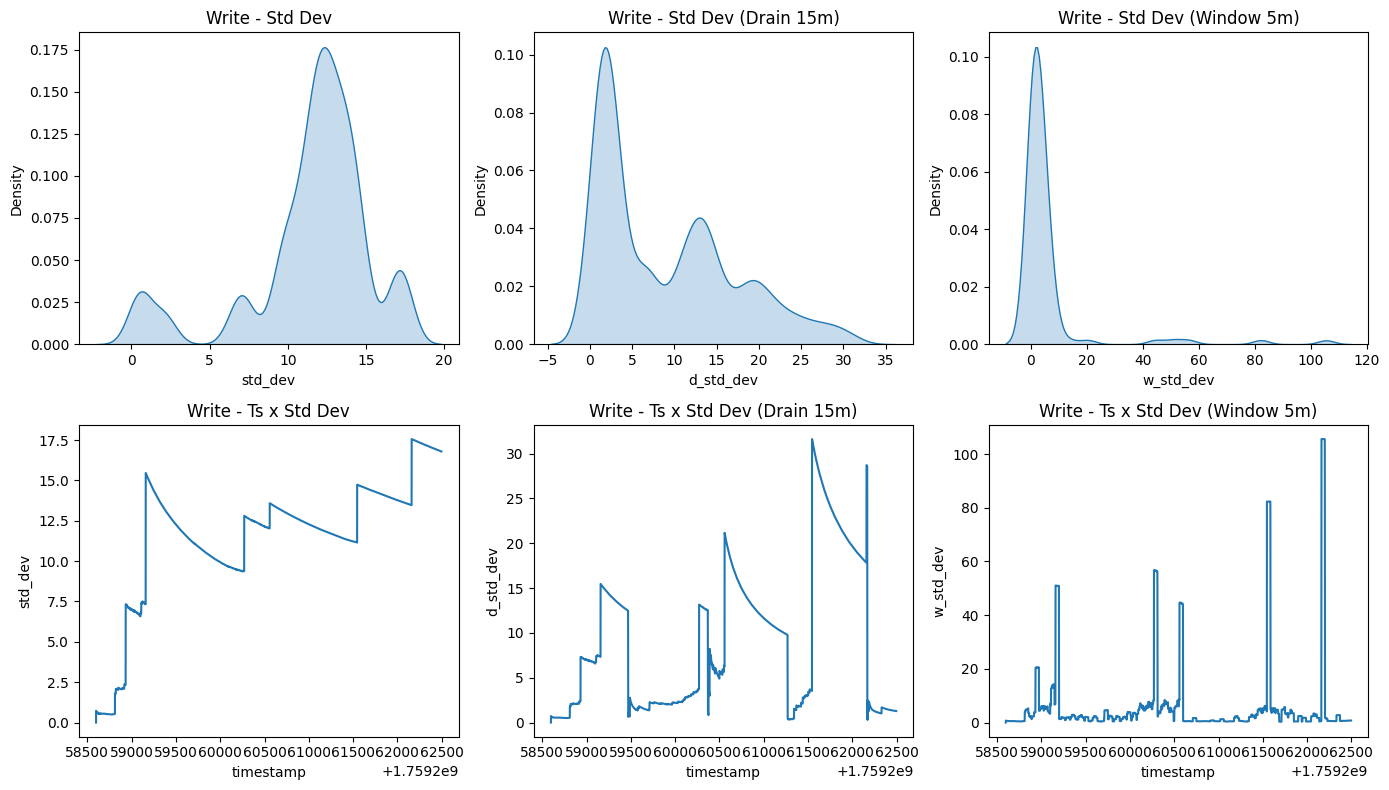

In [50]:
# std_dev
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['std_dev'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - Std Dev")

sns.kdeplot(dataset_write_raw['d_std_dev'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - Std Dev (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_std_dev'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - Std Dev (Window 5m)")

sns.lineplot(x="timestamp", y="std_dev", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x Std Dev")

sns.lineplot(x="timestamp", y="d_std_dev", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x Std Dev (Drain 15m)")

sns.lineplot(x="timestamp", y="w_std_dev", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x Std Dev (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_std_dev_mixed.png'))
plt.show()

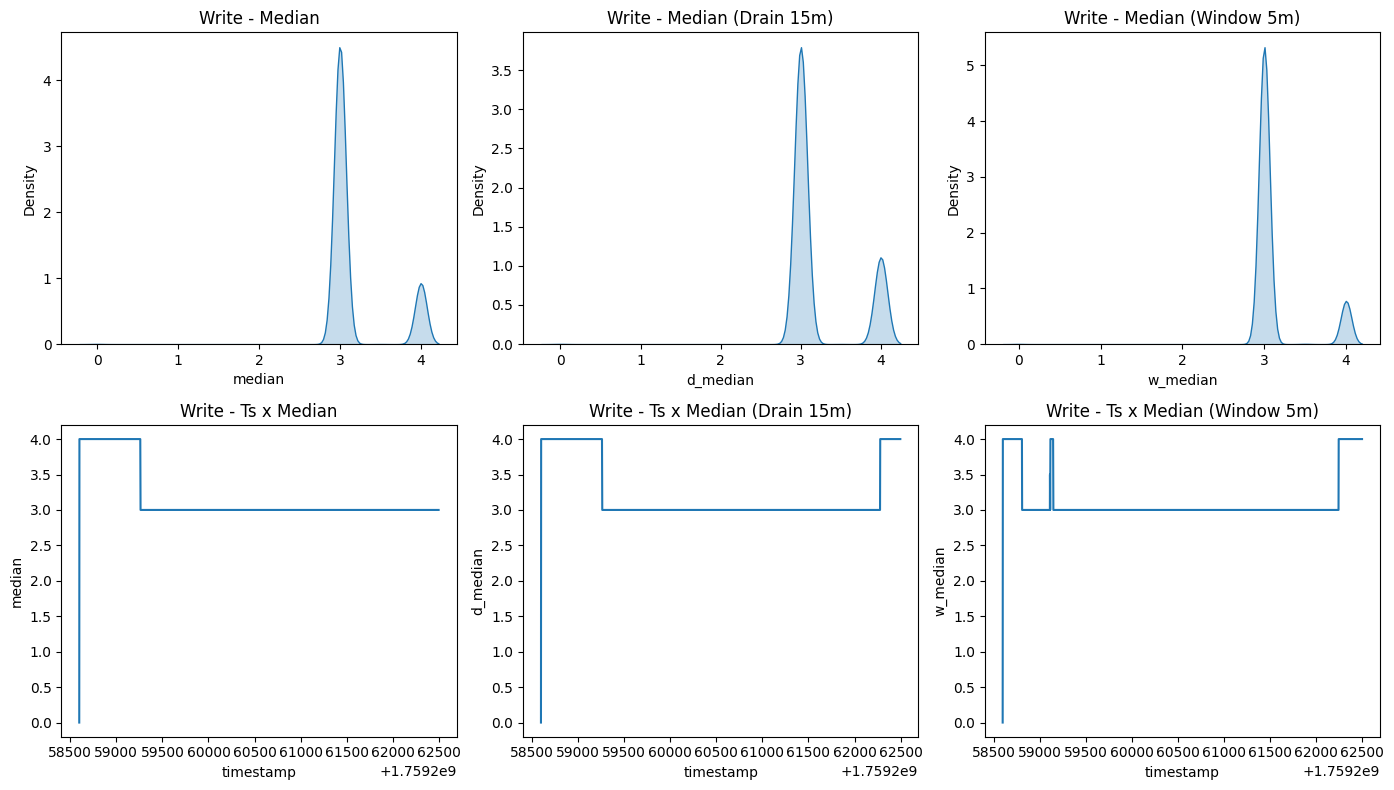

In [51]:
# median
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['median'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - Median")

sns.kdeplot(dataset_write_raw['d_median'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - Median (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_median'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - Median (Window 5m)")

sns.lineplot(x="timestamp", y="median", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x Median")

sns.lineplot(x="timestamp", y="d_median", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x Median (Drain 15m)")

sns.lineplot(x="timestamp", y="w_median", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x Median (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_median_mixed.png'))
plt.show()

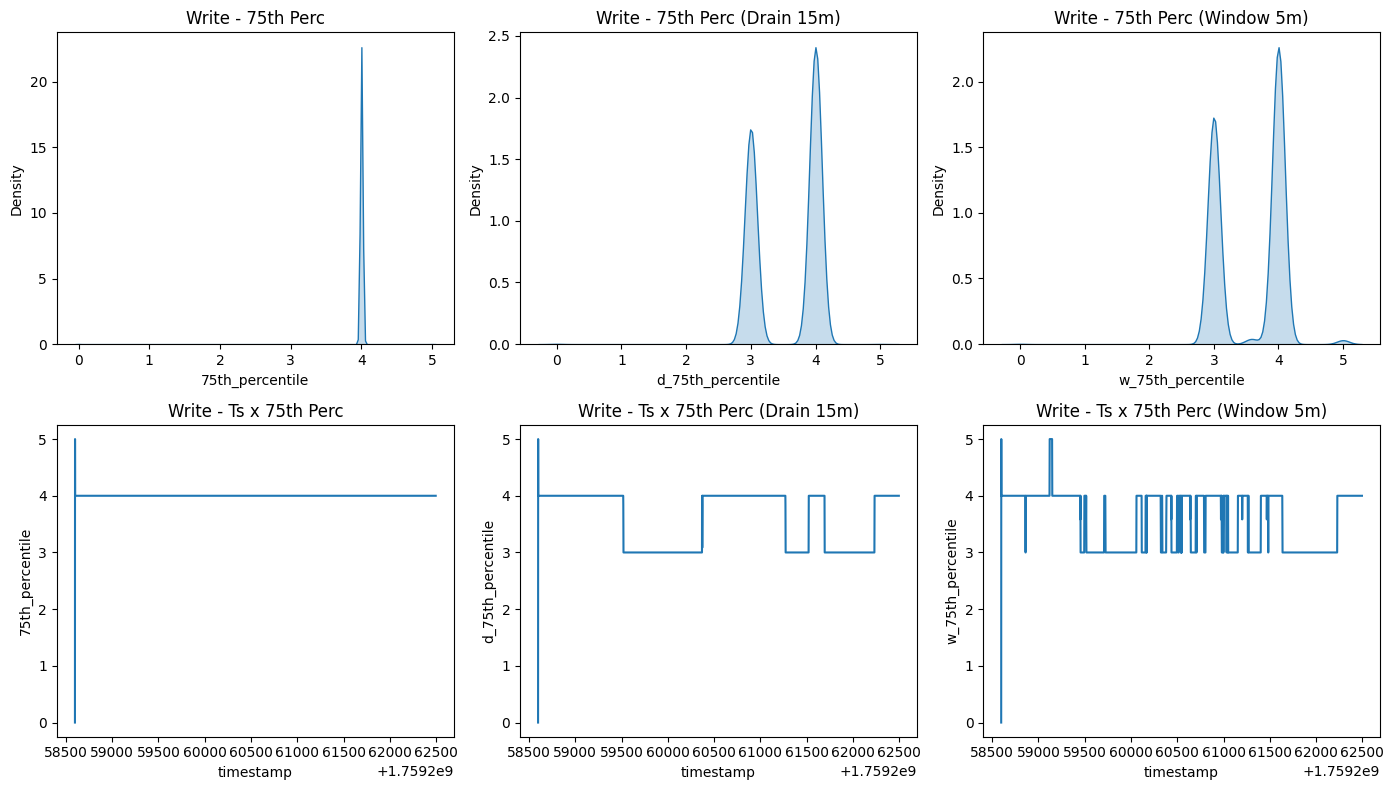

In [52]:
# 75th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['75th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - 75th Perc")

sns.kdeplot(dataset_write_raw['d_75th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - 75th Perc (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_75th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - 75th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="75th_percentile", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x 75th Perc")

sns.lineplot(x="timestamp", y="d_75th_percentile", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x 75th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_75th_percentile", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x 75th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_75th_percentile_mixed.png'))
plt.show()

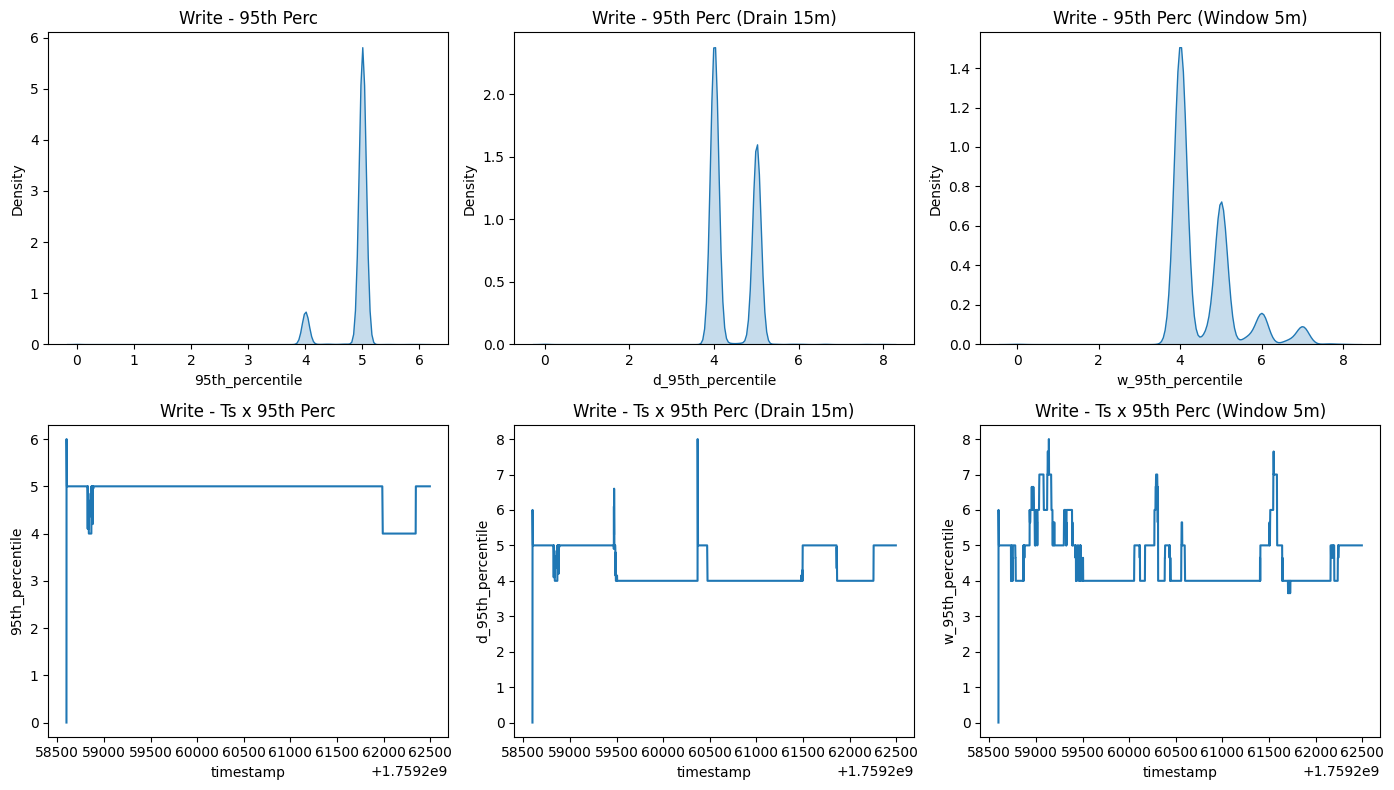

In [53]:
# 95th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['95th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - 95th Perc")

sns.kdeplot(dataset_write_raw['d_95th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - 95th Perc (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_95th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - 95th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="95th_percentile", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x 95th Perc")

sns.lineplot(x="timestamp", y="d_95th_percentile", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x 95th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_95th_percentile", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x 95th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_95th_percentile_mixed.png'))
plt.show()

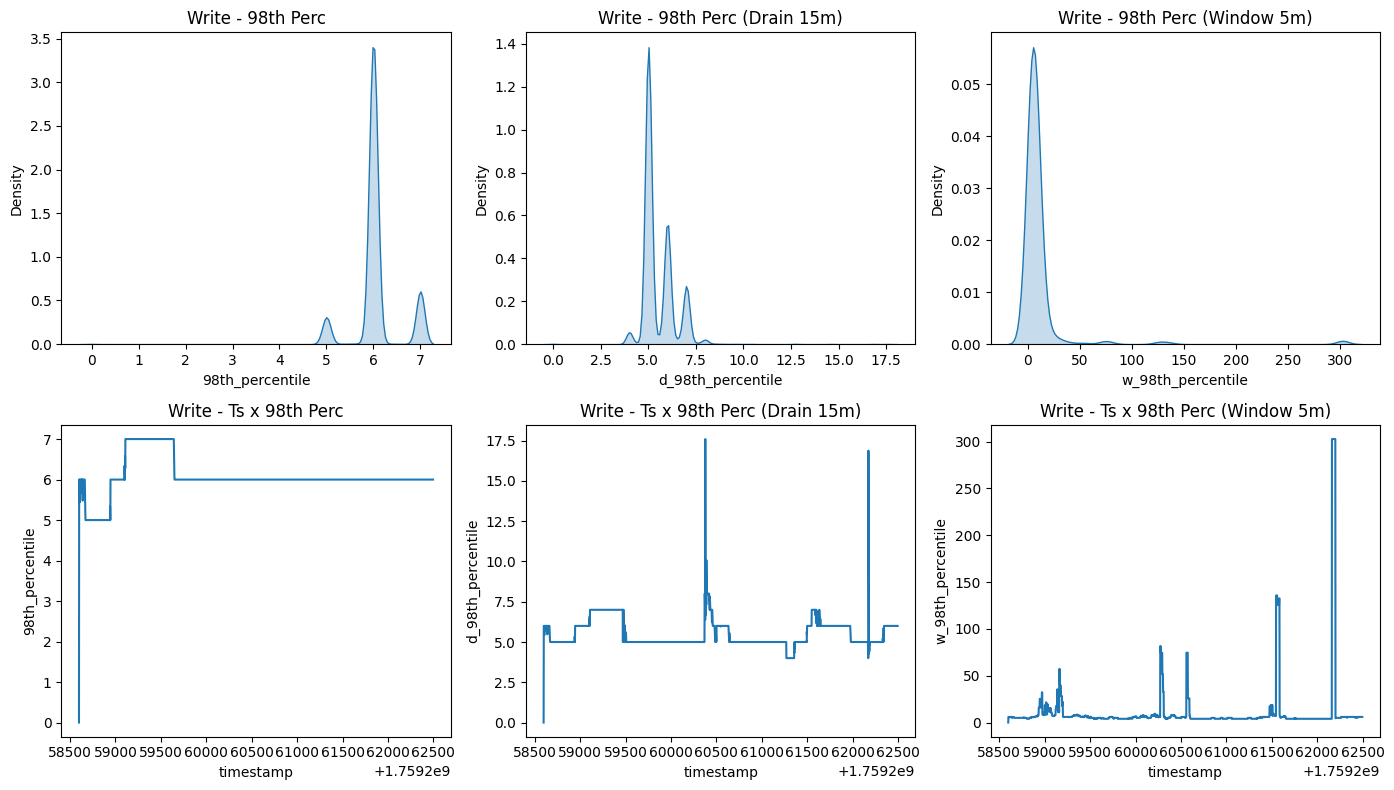

In [54]:
# 98th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['98th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - 98th Perc")

sns.kdeplot(dataset_write_raw['d_98th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - 98th Perc (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_98th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - 98th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="98th_percentile", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x 98th Perc")

sns.lineplot(x="timestamp", y="d_98th_percentile", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x 98th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_98th_percentile", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x 98th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_98th_percentile_mixed.png'))
plt.show()

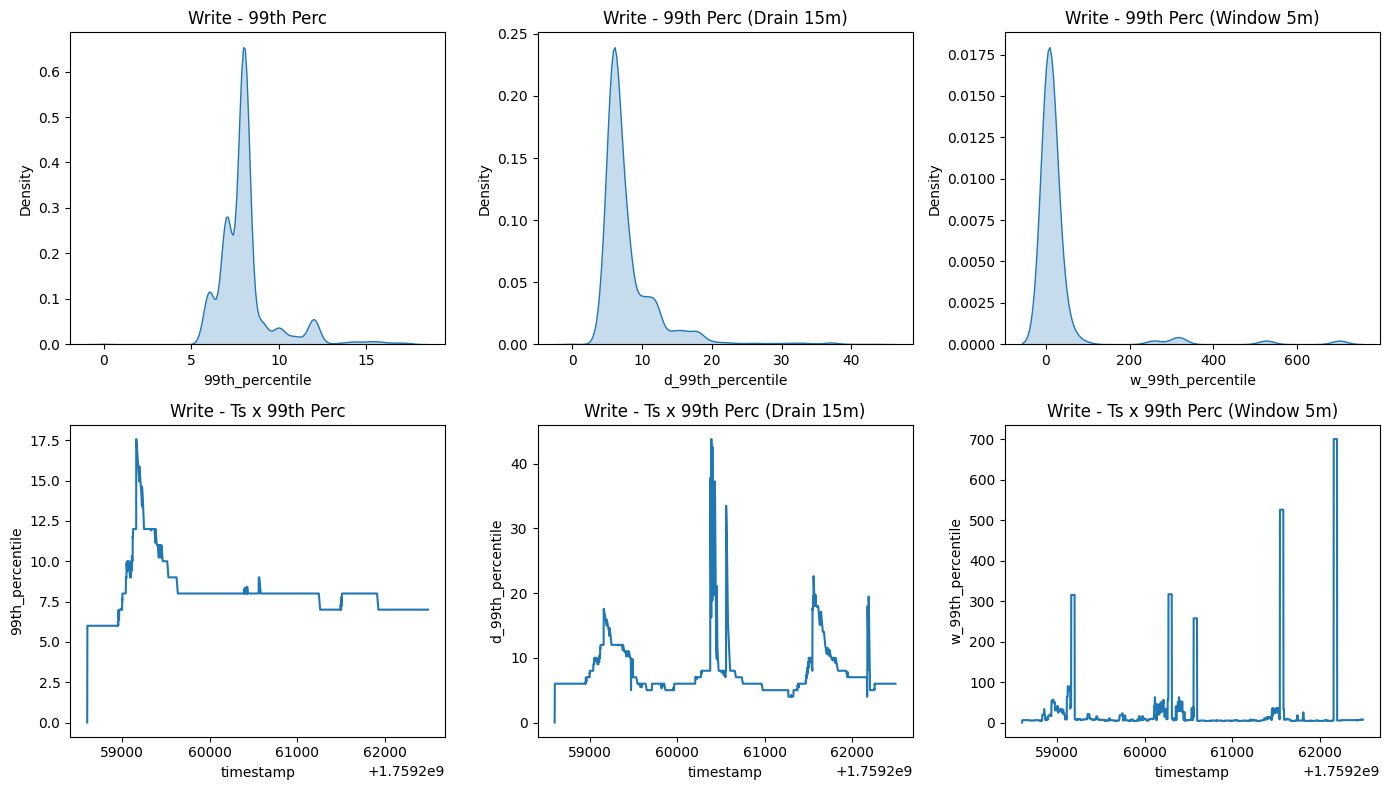

In [55]:
# 99th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['99th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - 99th Perc")

sns.kdeplot(dataset_write_raw['d_99th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - 99th Perc (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_99th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - 99th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="99th_percentile", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x 99th Perc")

sns.lineplot(x="timestamp", y="d_99th_percentile", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x 99th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_99th_percentile", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x 99th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_99th_percentile_mixed.png'))
plt.show()

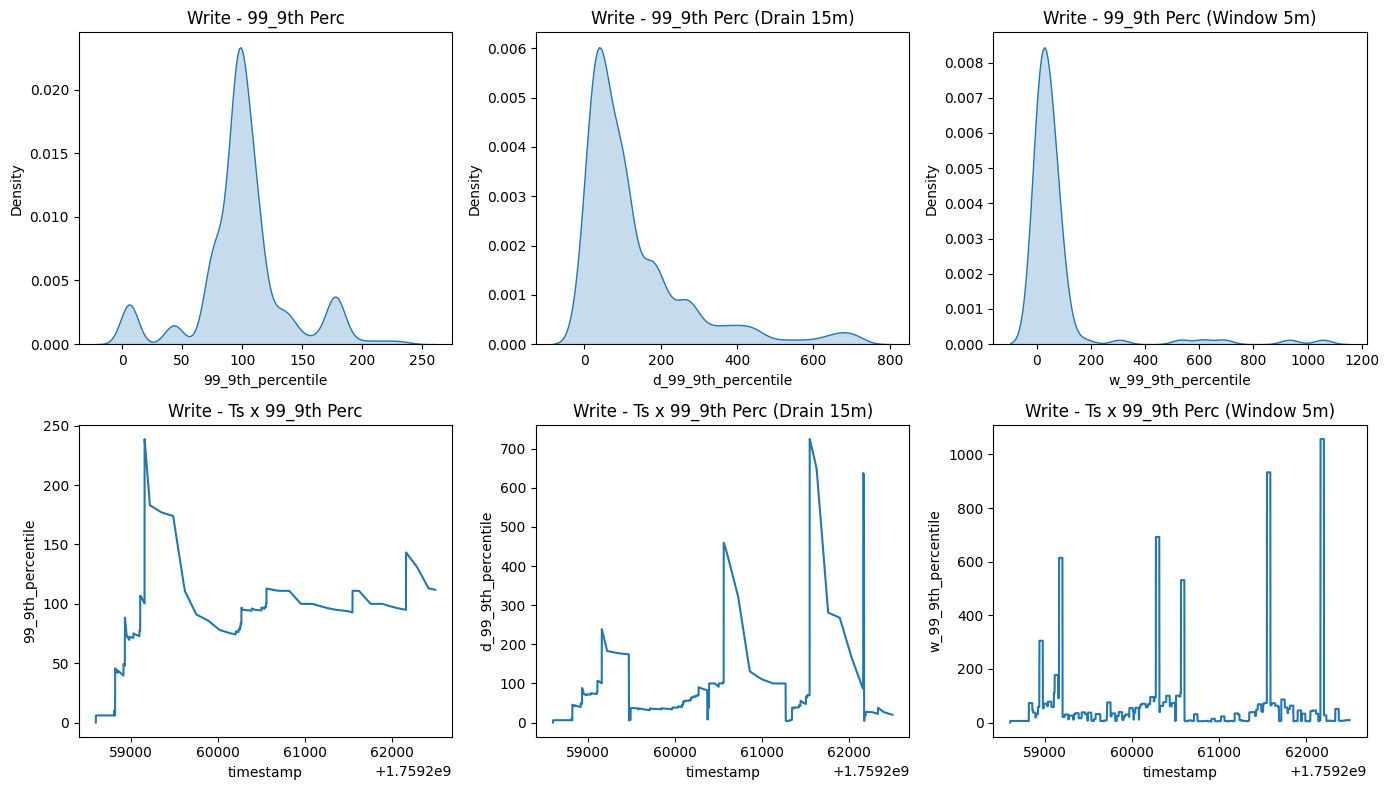

In [56]:
# 99_9th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_write_raw['99_9th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Write - 99_9th Perc")

sns.kdeplot(dataset_write_raw['d_99_9th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Write - 99_9th Perc (Drain 15m)")

sns.kdeplot(dataset_write_raw['w_99_9th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Write - 99_9th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="99_9th_percentile", data=dataset_write_raw, ax=axes[1,0])
axes[1,0].set_title("Write - Ts x 99_9th Perc")

sns.lineplot(x="timestamp", y="d_99_9th_percentile", data=dataset_write_raw, ax=axes[1,1])
axes[1,1].set_title("Write - Ts x 99_9th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_99_9th_percentile", data=dataset_write_raw, ax=axes[1,2])
axes[1,2].set_title("Write - Ts x 99_9th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'write_metrics_snap_99_9th_percentile_mixed.png'))
plt.show()

# KDE for read dataset metrics

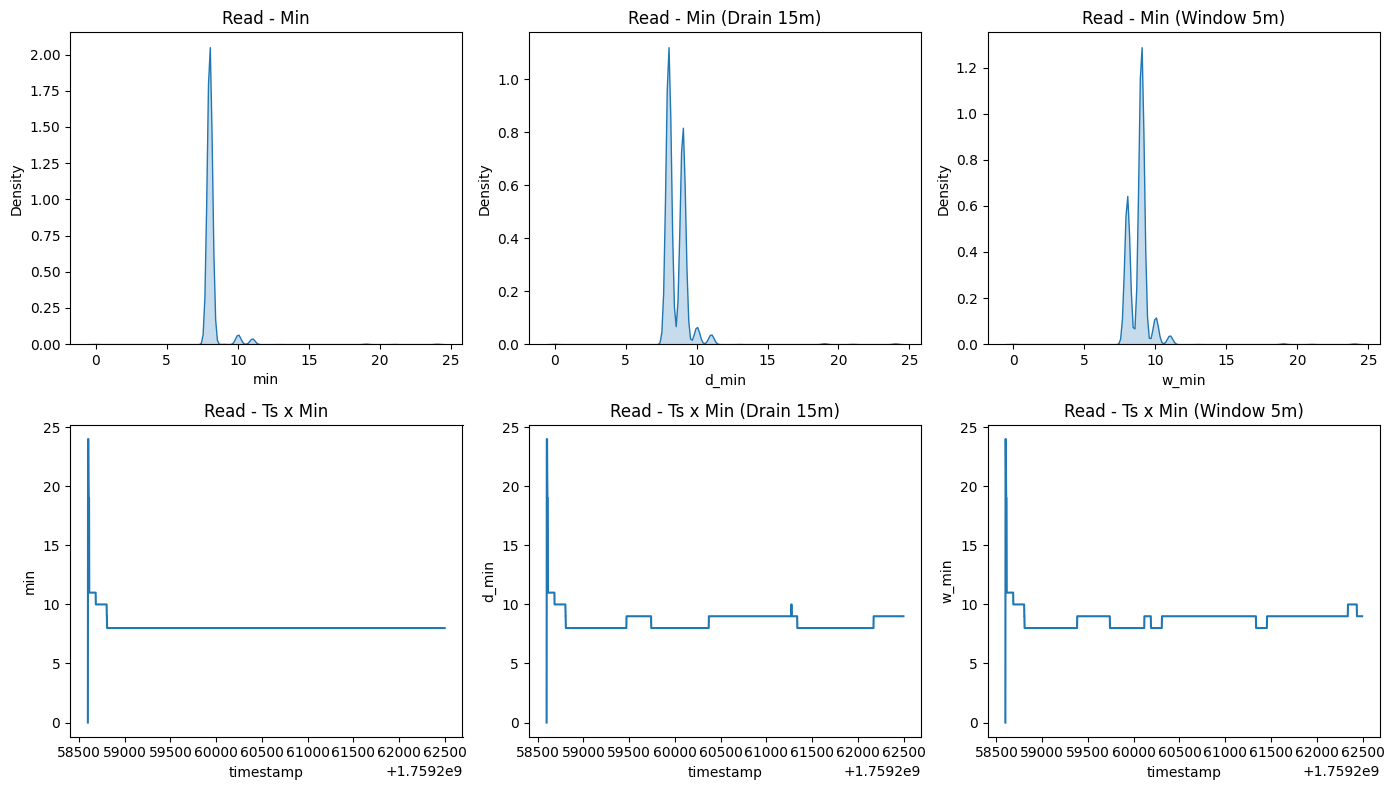

In [57]:
# min
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['min'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - Min")

sns.kdeplot(dataset_read_raw['d_min'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - Min (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_min'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - Min (Window 5m)")

sns.lineplot(x="timestamp", y="min", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x Min")

sns.lineplot(x="timestamp", y="d_min", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x Min (Drain 15m)")

sns.lineplot(x="timestamp", y="w_min", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x Min (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_min_mixed.png'))
plt.show()

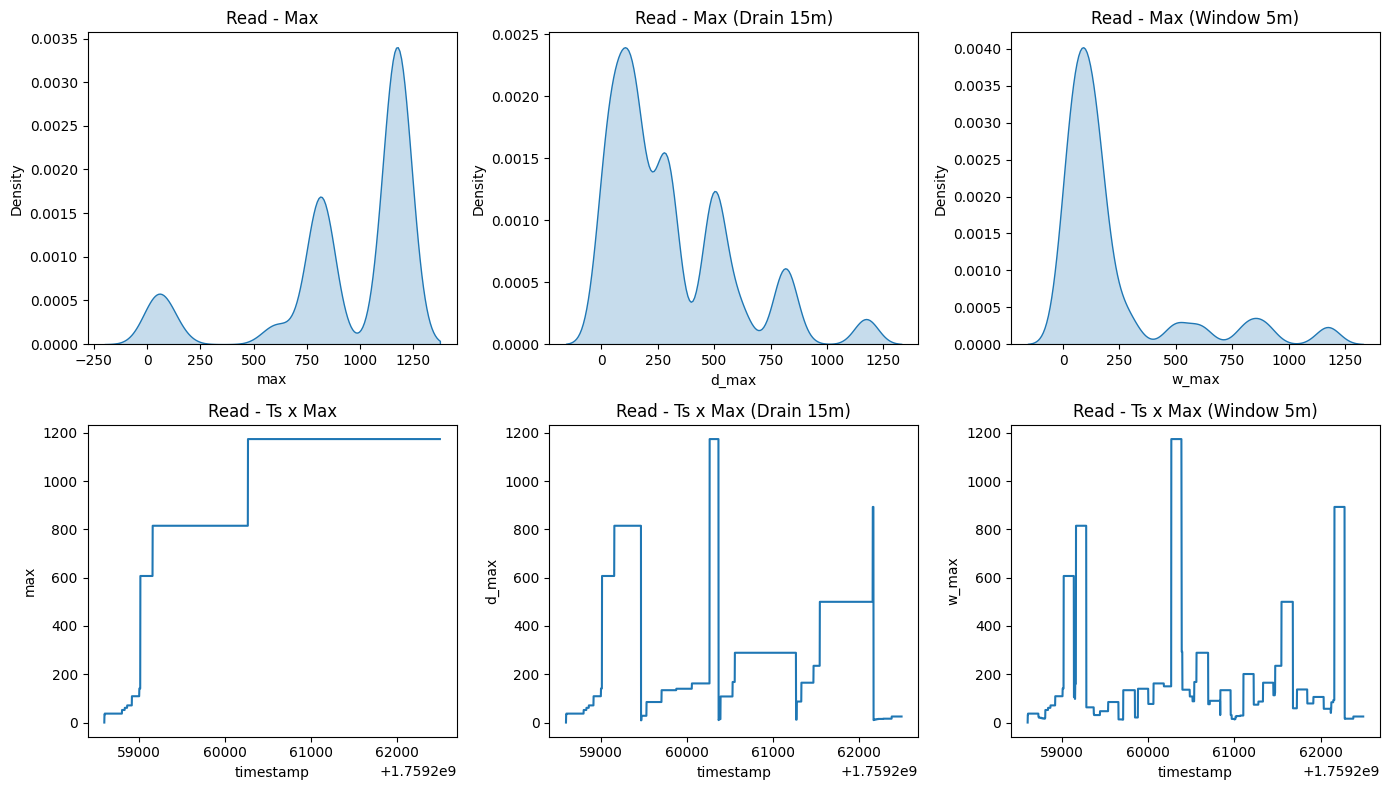

In [58]:
# max
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['max'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - Max")

sns.kdeplot(dataset_read_raw['d_max'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - Max (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_max'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - Max (Window 5m)")

sns.lineplot(x="timestamp", y="max", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x Max")

sns.lineplot(x="timestamp", y="d_max", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x Max (Drain 15m)")

sns.lineplot(x="timestamp", y="w_max", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x Max (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_max_mixed.png'))
plt.show()

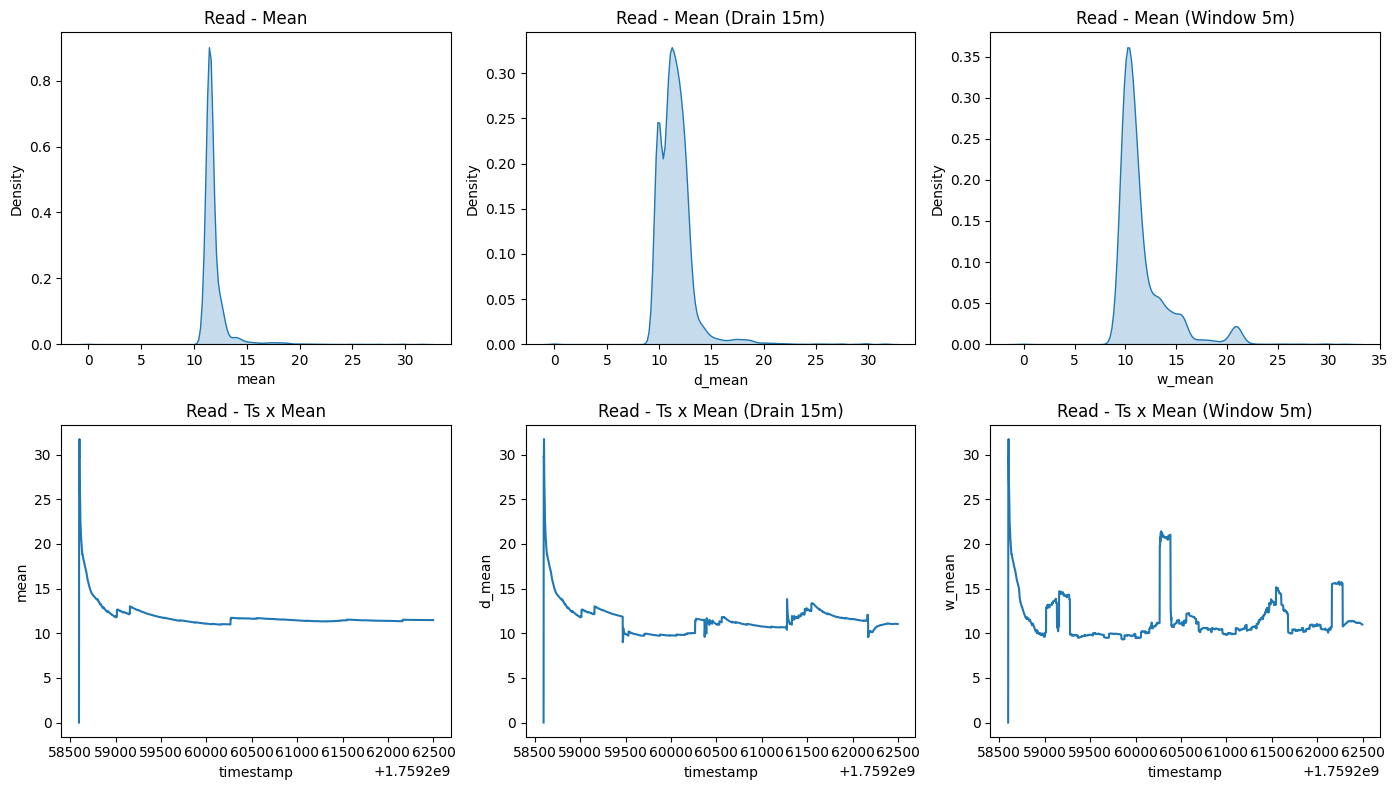

In [59]:
# mean
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['mean'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - Mean")

sns.kdeplot(dataset_read_raw['d_mean'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - Mean (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_mean'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - Mean (Window 5m)")

sns.lineplot(x="timestamp", y="mean", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x Mean")

sns.lineplot(x="timestamp", y="d_mean", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x Mean (Drain 15m)")

sns.lineplot(x="timestamp", y="w_mean", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x Mean (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_mean_mixed.png'))
plt.show()

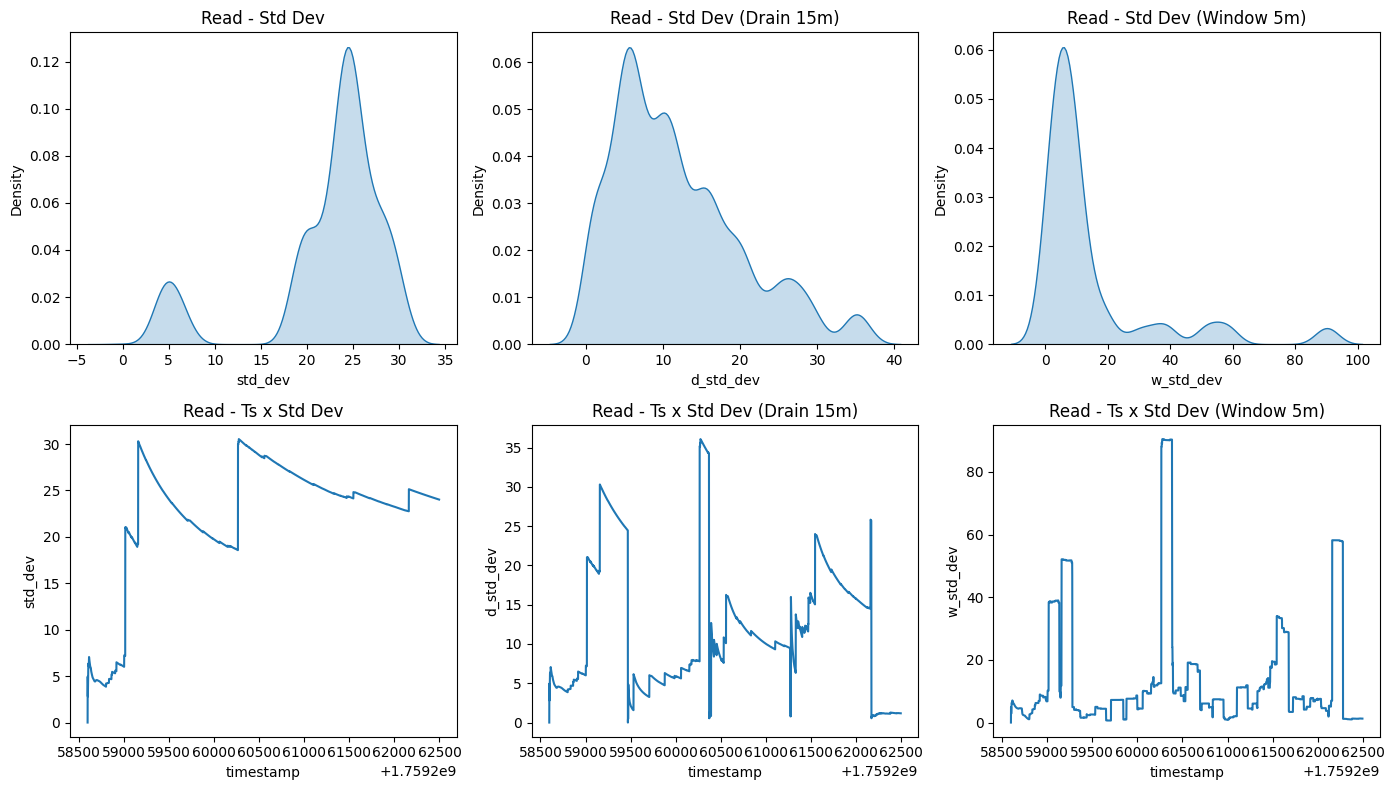

In [60]:
# std_dev
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['std_dev'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - Std Dev")

sns.kdeplot(dataset_read_raw['d_std_dev'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - Std Dev (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_std_dev'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - Std Dev (Window 5m)")

sns.lineplot(x="timestamp", y="std_dev", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x Std Dev")

sns.lineplot(x="timestamp", y="d_std_dev", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x Std Dev (Drain 15m)")

sns.lineplot(x="timestamp", y="w_std_dev", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x Std Dev (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_std_dev_mixed.png'))
plt.show()

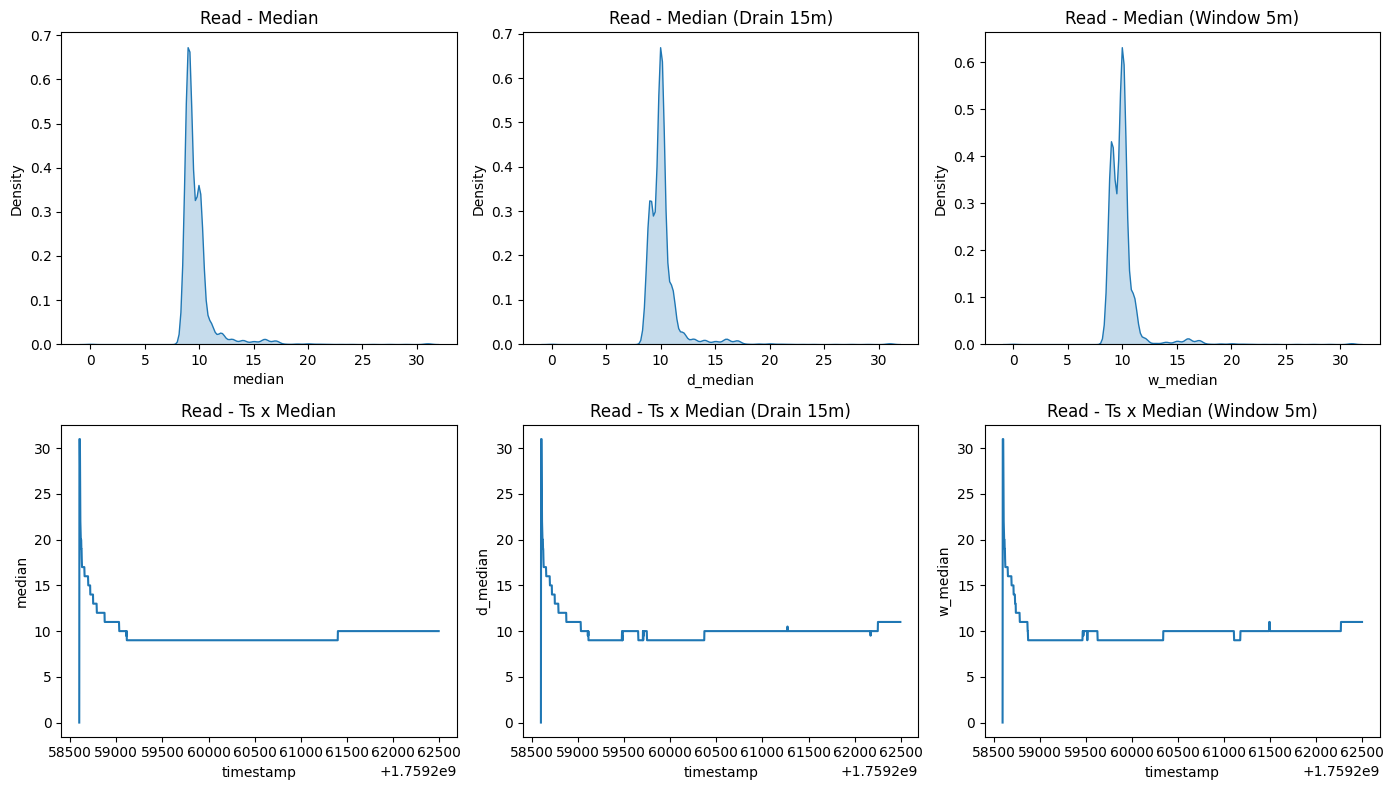

In [61]:
# median
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['median'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - Median")

sns.kdeplot(dataset_read_raw['d_median'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - Median (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_median'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - Median (Window 5m)")

sns.lineplot(x="timestamp", y="median", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x Median")

sns.lineplot(x="timestamp", y="d_median", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x Median (Drain 15m)")

sns.lineplot(x="timestamp", y="w_median", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x Median (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_median_mixed.png'))
plt.show()

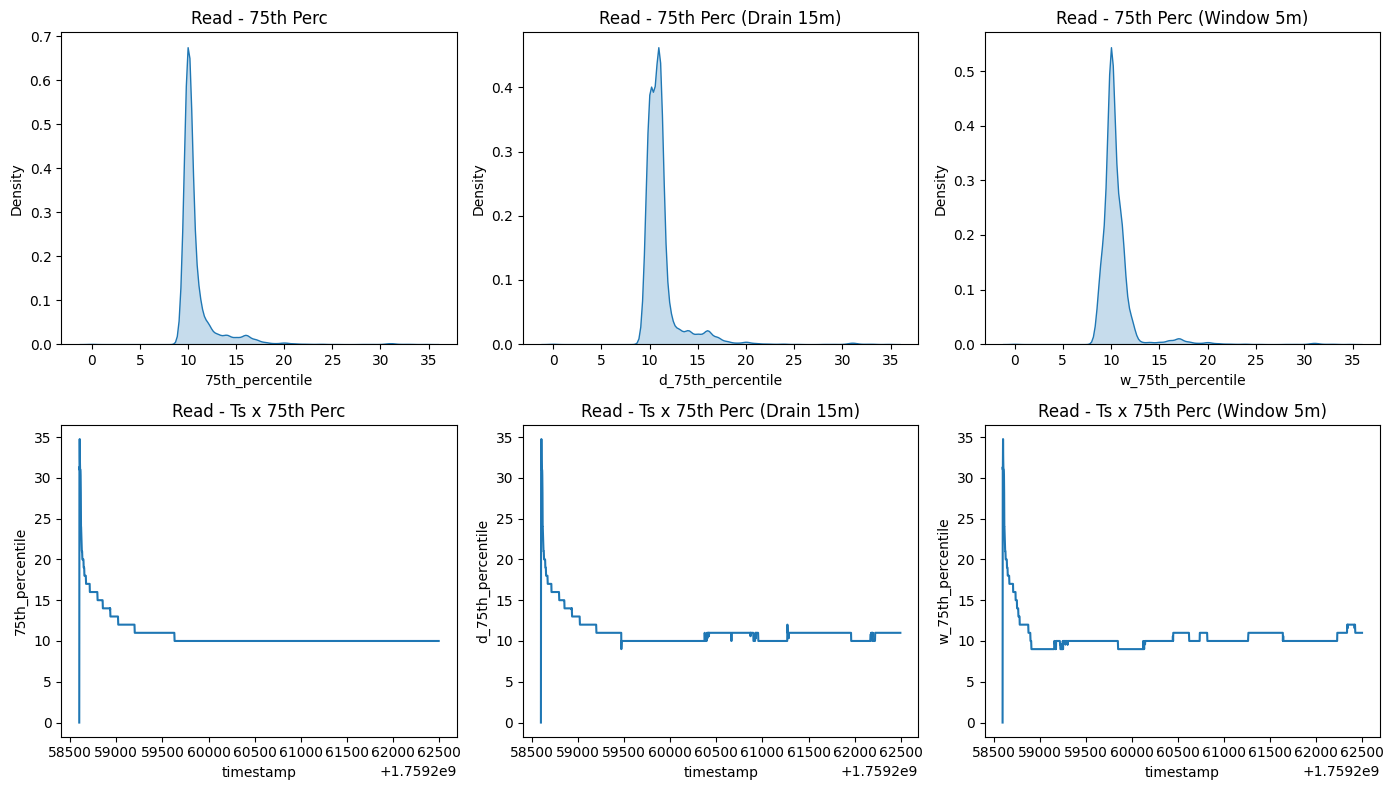

In [62]:
# 75th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['75th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - 75th Perc")

sns.kdeplot(dataset_read_raw['d_75th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - 75th Perc (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_75th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - 75th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="75th_percentile", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x 75th Perc")

sns.lineplot(x="timestamp", y="d_75th_percentile", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x 75th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_75th_percentile", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x 75th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_75th_percentile_mixed.png'))
plt.show()

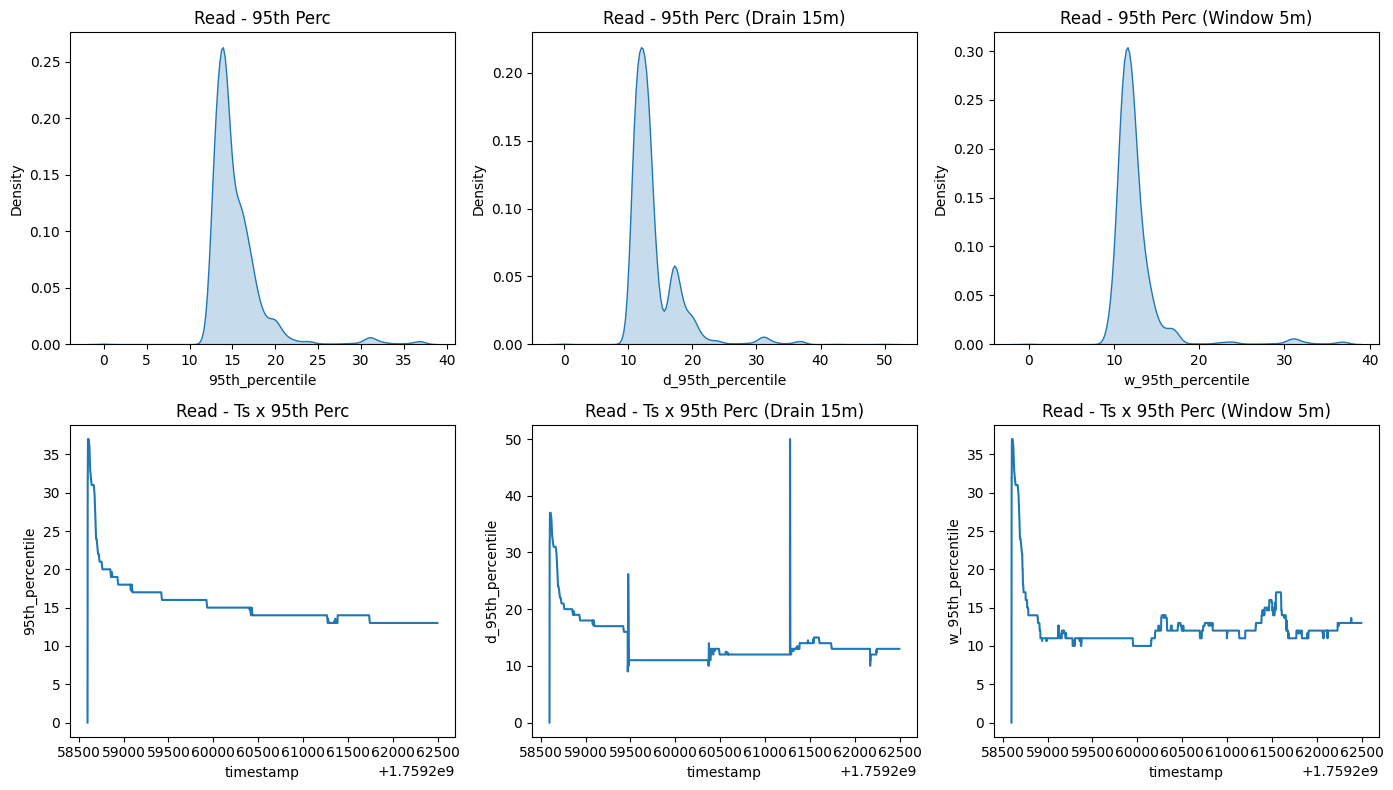

In [63]:
# 95th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['95th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - 95th Perc")

sns.kdeplot(dataset_read_raw['d_95th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - 95th Perc (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_95th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - 95th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="95th_percentile", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x 95th Perc")

sns.lineplot(x="timestamp", y="d_95th_percentile", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x 95th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_95th_percentile", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x 95th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_95th_percentile_mixed.png'))
plt.show()

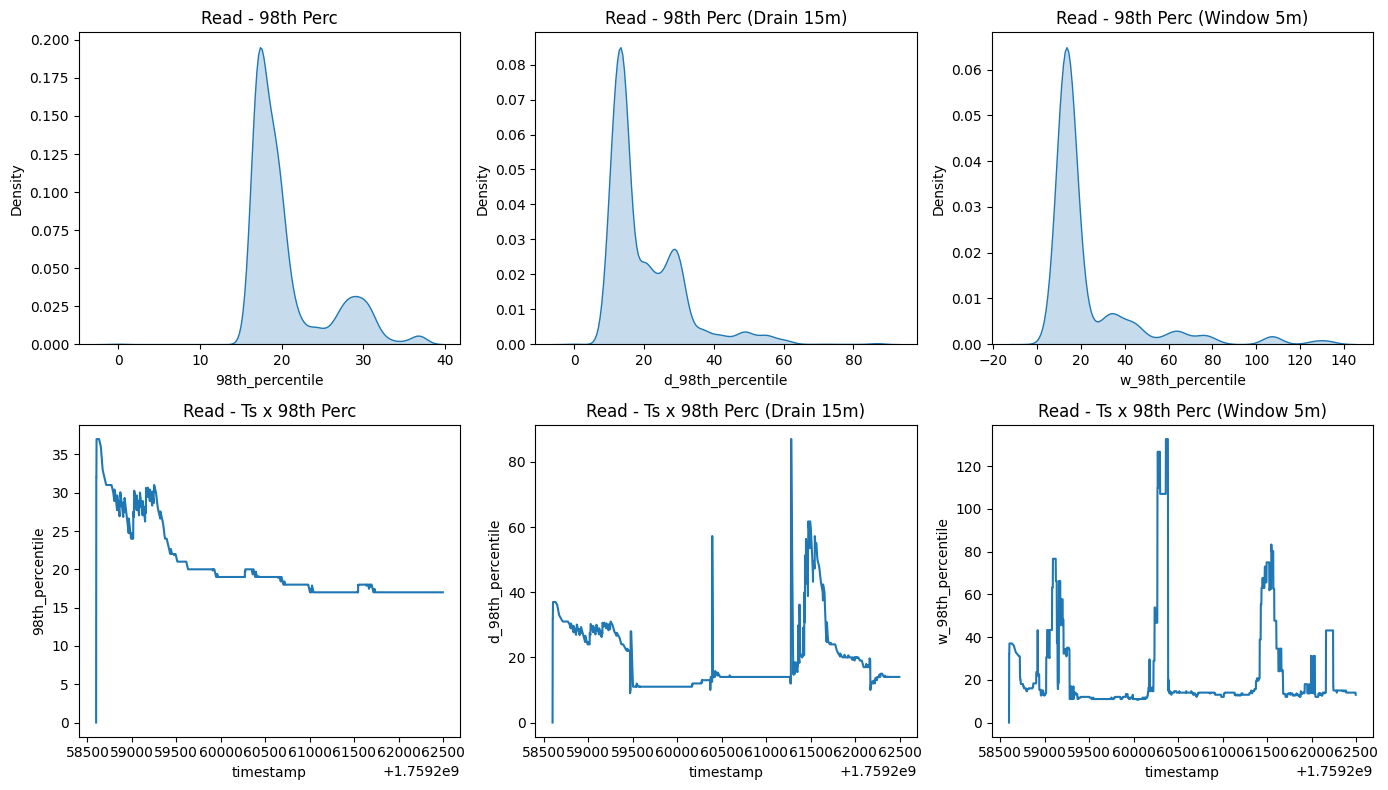

In [64]:
# 98th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['98th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - 98th Perc")

sns.kdeplot(dataset_read_raw['d_98th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - 98th Perc (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_98th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - 98th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="98th_percentile", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x 98th Perc")

sns.lineplot(x="timestamp", y="d_98th_percentile", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x 98th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_98th_percentile", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x 98th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_98th_percentile_mixed.png'))
plt.show()

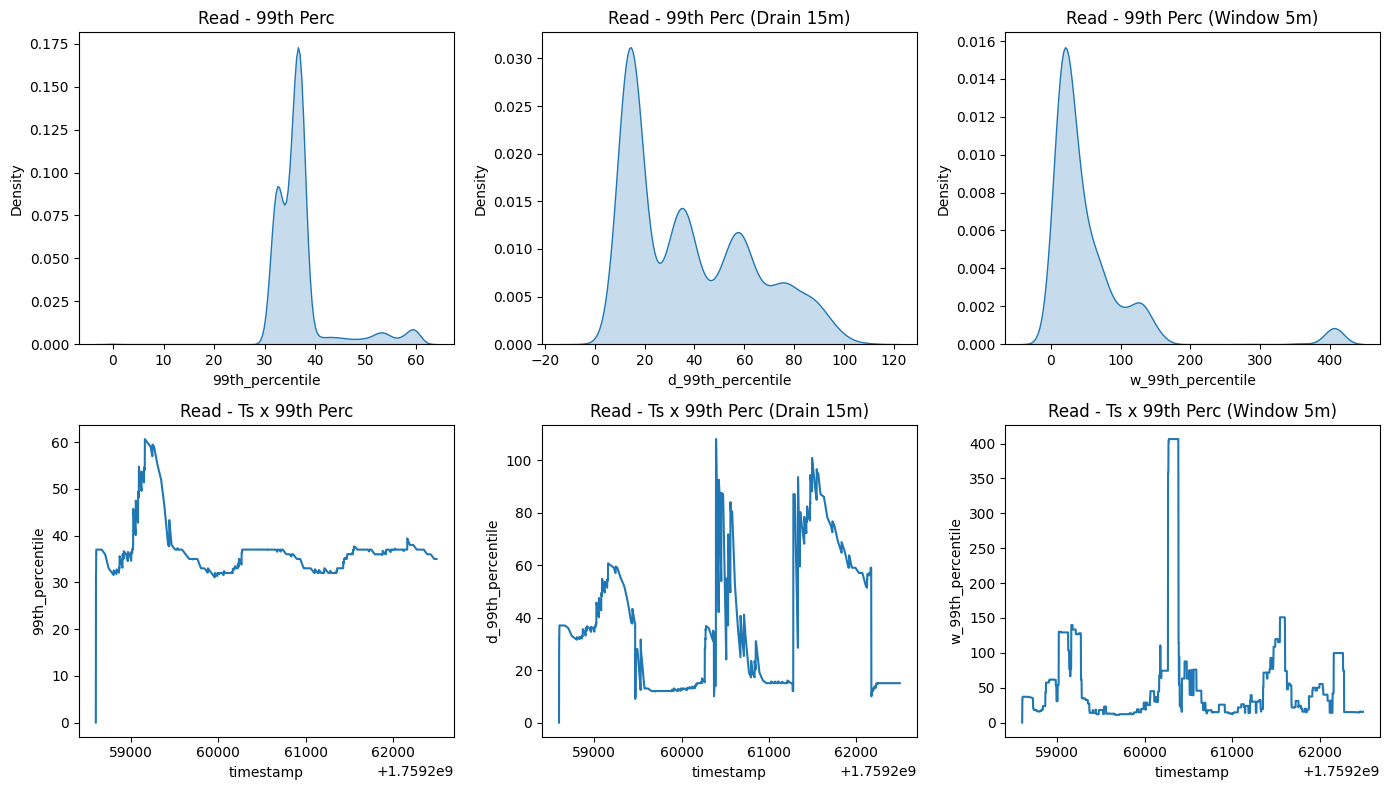

In [65]:
# 99th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['99th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - 99th Perc")

sns.kdeplot(dataset_read_raw['d_99th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - 99th Perc (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_99th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - 99th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="99th_percentile", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x 99th Perc")

sns.lineplot(x="timestamp", y="d_99th_percentile", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x 99th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_99th_percentile", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x 99th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_99th_percentile_mixed.png'))
plt.show()

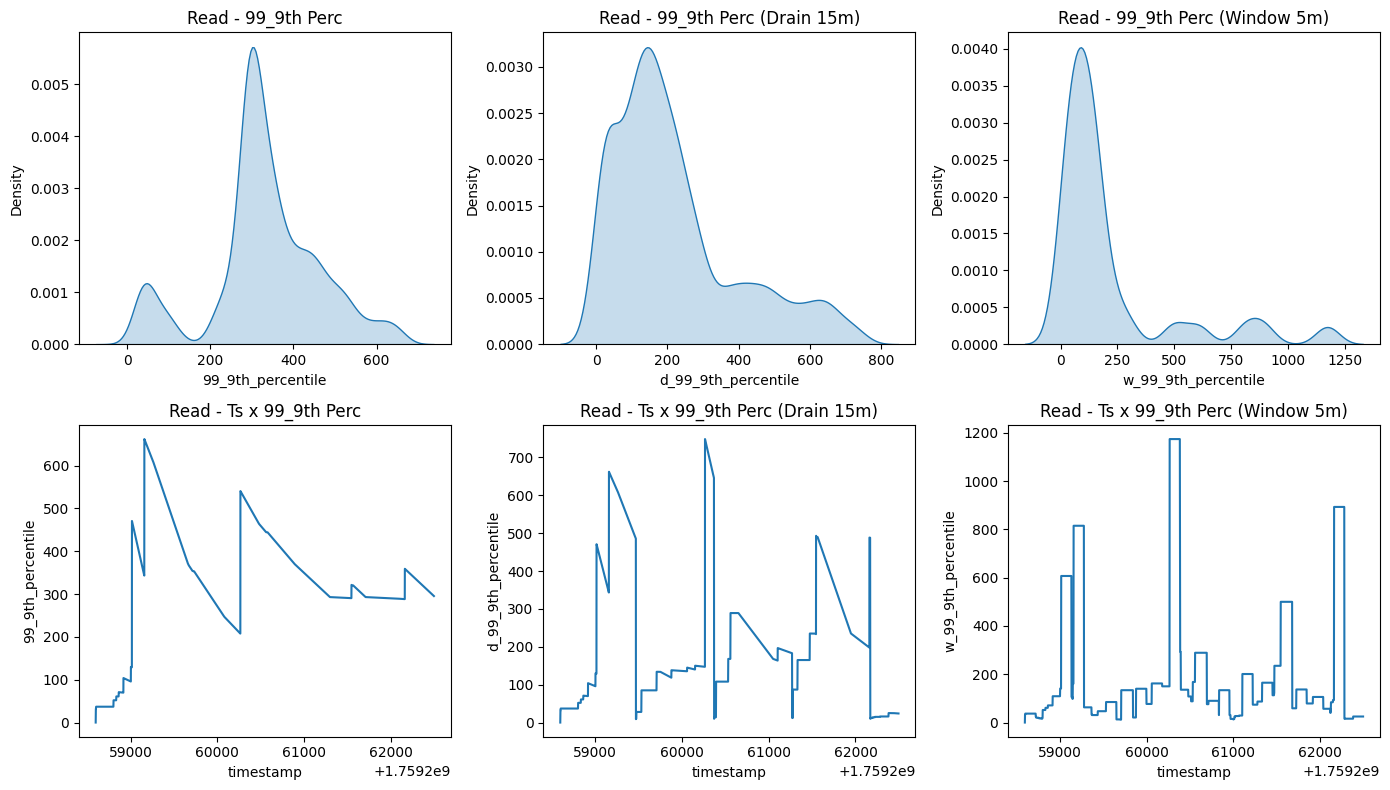

In [66]:
# 99_9th_percentile
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
sns.kdeplot(dataset_read_raw['99_9th_percentile'],fill=True, ax=axes[0,0])
axes[0,0].set_title("Read - 99_9th Perc")

sns.kdeplot(dataset_read_raw['d_99_9th_percentile'],fill=True, ax=axes[0,1])
axes[0,1].set_title("Read - 99_9th Perc (Drain 15m)")

sns.kdeplot(dataset_read_raw['w_99_9th_percentile'],fill=True, ax=axes[0,2])
axes[0,2].set_title("Read - 99_9th Perc (Window 5m)")

sns.lineplot(x="timestamp", y="99_9th_percentile", data=dataset_read_raw, ax=axes[1,0])
axes[1,0].set_title("Read - Ts x 99_9th Perc")

sns.lineplot(x="timestamp", y="d_99_9th_percentile", data=dataset_read_raw, ax=axes[1,1])
axes[1,1].set_title("Read - Ts x 99_9th Perc (Drain 15m)")

sns.lineplot(x="timestamp", y="w_99_9th_percentile", data=dataset_read_raw, ax=axes[1,2])
axes[1,2].set_title("Read - Ts x 99_9th Perc (Window 5m)")

plt.tight_layout() # Adjust layout to prevent overlap
plt.savefig(os.path.join('images/exp_30c', 'read_metrics_snap_99_9th_percentile_mixed.png'))
plt.show()

# KDE for read and write dataset metrics

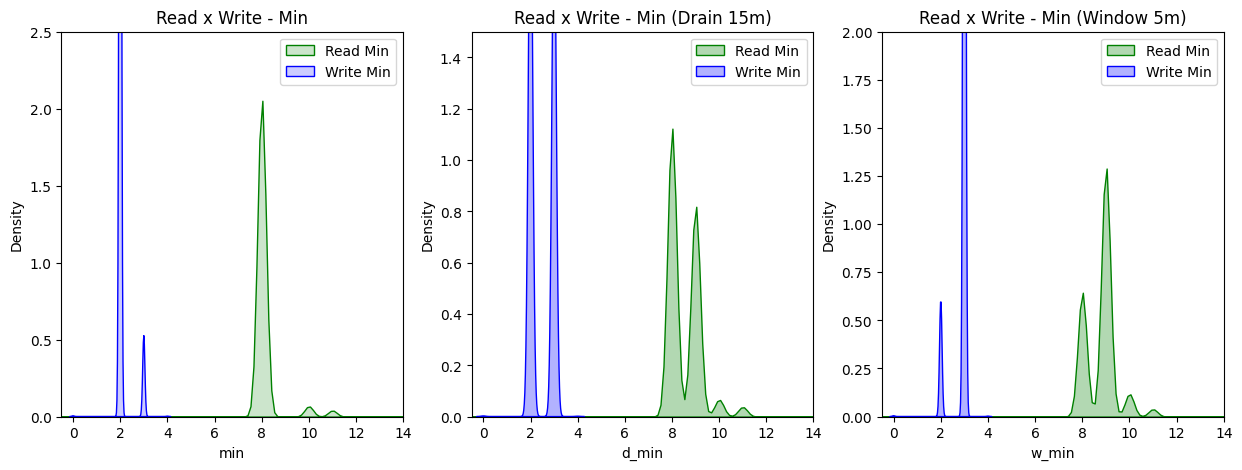

In [75]:
# min
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['min'], color='green', fill=True, label='Read Min', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['min'], color='b', fill=True, label='Write Min', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - Min")
axes[0].set_xlim(-0.5, 14)
axes[0].set_ylim(0, 2.5)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_min'], color='green', fill=True, label='Read Min', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_min'], color='b', fill=True, label='Write Min', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - Min (Drain 15m)")
axes[1].set_xlim(-0.5, 14)
axes[1].set_ylim(0, 1.5)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_min'], color='green', fill=True, label='Read Min', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_min'], color='b', fill=True, label='Write Min', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - Min (Window 5m)")
axes[2].set_xlim(-0.5, 14)
axes[2].set_ylim(0, 2)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_min_mixed.png'))
plt.show()

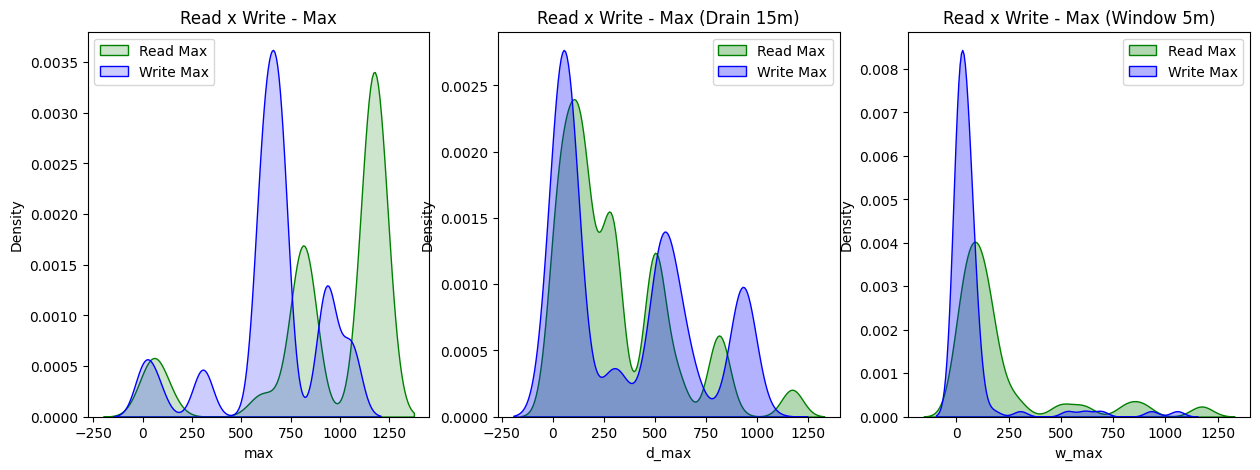

In [78]:
# max
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['max'], color='green', fill=True, label='Read Max', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['max'], color='b', fill=True, label='Write Max', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - Max")
# axes[0].set_xlim(-0.5, 14)
# axes[0].set_ylim(0, 2.5)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_max'], color='green', fill=True, label='Read Max', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_max'], color='b', fill=True, label='Write Max', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - Max (Drain 15m)")
# axes[1].set_xlim(-0.5, 14)
# axes[1].set_ylim(0, 1.5)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_max'], color='green', fill=True, label='Read Max', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_max'], color='b', fill=True, label='Write Max', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - Max (Window 5m)")
# axes[2].set_xlim(-0.5, 14)
# axes[2].set_ylim(0, 2)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_max_mixed.png'))
plt.show()

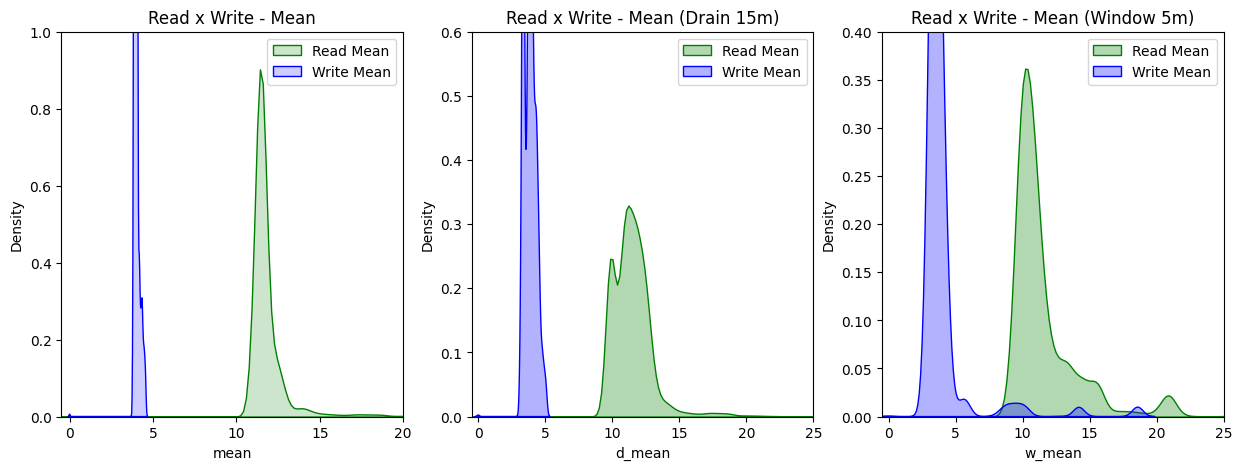

In [81]:
# mean
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['mean'], color='green', fill=True, label='Read Mean', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['mean'], color='b', fill=True, label='Write Mean', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - Mean")
axes[0].set_xlim(-0.5, 20)
axes[0].set_ylim(0, 1.0)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_mean'], color='green', fill=True, label='Read Mean', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_mean'], color='b', fill=True, label='Write Mean', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - Mean (Drain 15m)")
axes[1].set_xlim(-0.5, 25)
axes[1].set_ylim(0, 0.6)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_mean'], color='green', fill=True, label='Read Mean', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_mean'], color='b', fill=True, label='Write Mean', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - Mean (Window 5m)")
axes[2].set_xlim(-0.5, 25)
axes[2].set_ylim(0, 0.4)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_mean_mixed.png'))
plt.show()

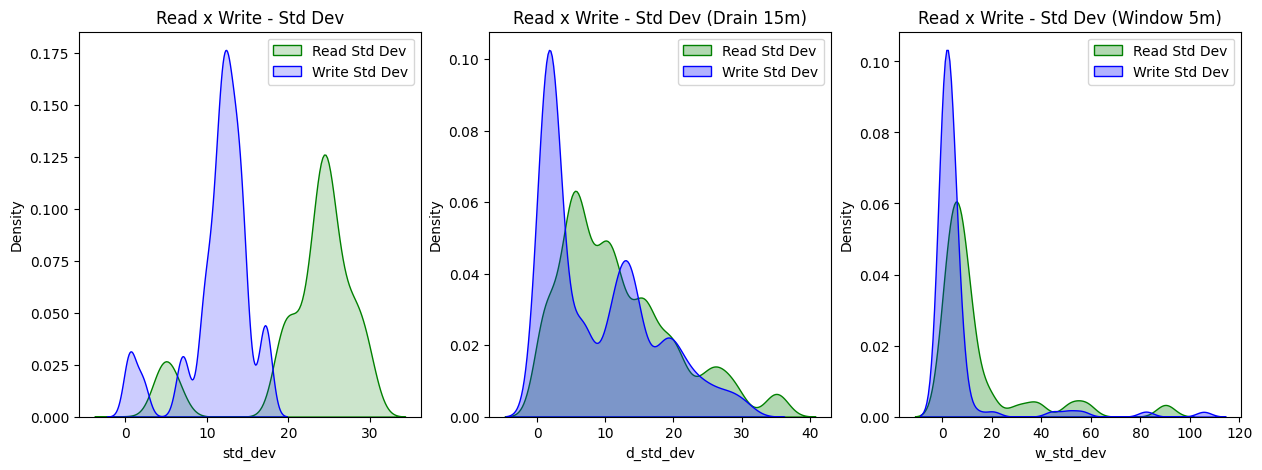

In [83]:
# std_dev
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['std_dev'], color='green', fill=True, label='Read Std Dev', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['std_dev'], color='b', fill=True, label='Write Std Dev', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - Std Dev")
# axes[0].set_xlim(-0.5, 20)
# axes[0].set_ylim(0, 1.0)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_std_dev'], color='green', fill=True, label='Read Std Dev', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_std_dev'], color='b', fill=True, label='Write Std Dev', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - Std Dev (Drain 15m)")
# axes[1].set_xlim(-0.5, 25)
# axes[1].set_ylim(0, 0.6)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_std_dev'], color='green', fill=True, label='Read Std Dev', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_std_dev'], color='b', fill=True, label='Write Std Dev', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - Std Dev (Window 5m)")
# axes[2].set_xlim(-0.5, 25)
# axes[2].set_ylim(0, 0.4)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_std_dev_mixed.png'))
plt.show()

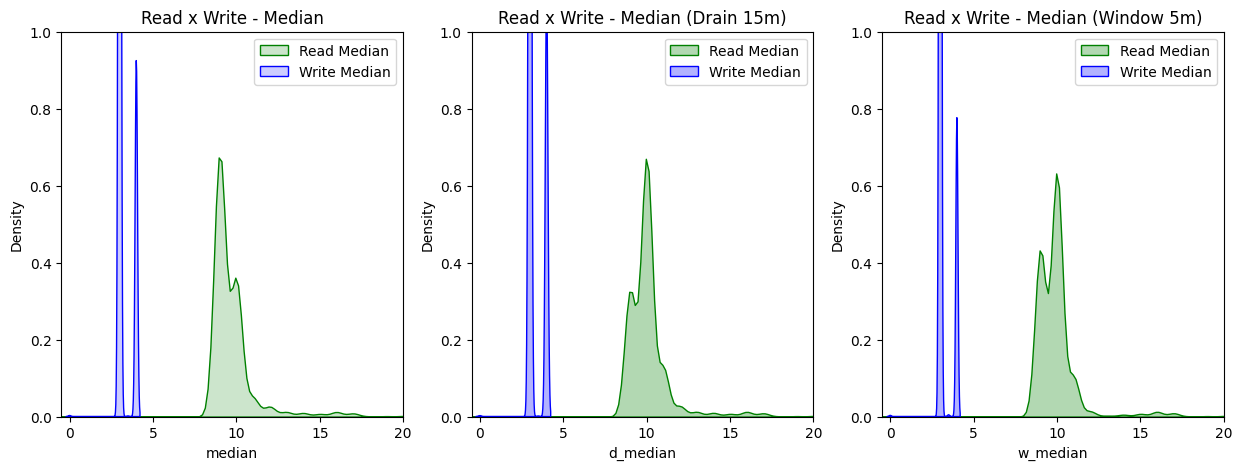

In [85]:
# median
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['median'], color='green', fill=True, label='Read Median', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['median'], color='b', fill=True, label='Write Median', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - Median")
axes[0].set_xlim(-0.5, 20)
axes[0].set_ylim(0, 1.0)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_median'], color='green', fill=True, label='Read Median', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_median'], color='b', fill=True, label='Write Median', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - Median (Drain 15m)")
axes[1].set_xlim(-0.5, 20)
axes[1].set_ylim(0, 1)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_median'], color='green', fill=True, label='Read Median', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_median'], color='b', fill=True, label='Write Median', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - Median (Window 5m)")
axes[2].set_xlim(-0.5, 20)
axes[2].set_ylim(0, 1)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_median_mixed.png'))
plt.show()

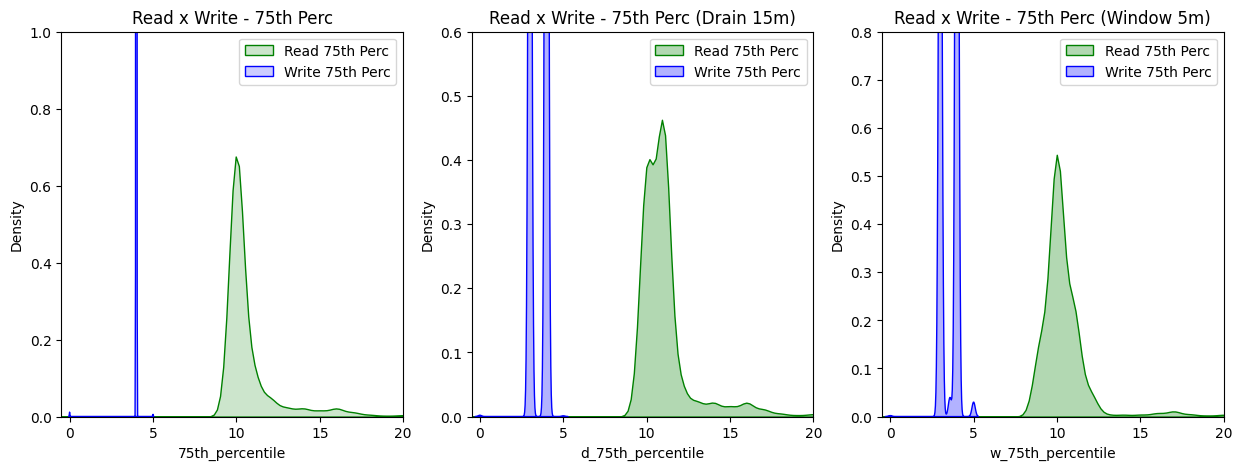

In [90]:
# 75th_percentile
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['75th_percentile'], color='green', fill=True, label='Read 75th Perc', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['75th_percentile'], color='b', fill=True, label='Write 75th Perc', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - 75th Perc")
axes[0].set_xlim(-0.5, 20)
axes[0].set_ylim(0, 1.0)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_75th_percentile'], color='green', fill=True, label='Read 75th Perc', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_75th_percentile'], color='b', fill=True, label='Write 75th Perc', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - 75th Perc (Drain 15m)")
axes[1].set_xlim(-0.5, 20)
axes[1].set_ylim(0, 0.6)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_75th_percentile'], color='green', fill=True, label='Read 75th Perc', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_75th_percentile'], color='b', fill=True, label='Write 75th Perc', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - 75th Perc (Window 5m)")
axes[2].set_xlim(-0.5, 20)
axes[2].set_ylim(0, 0.8)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_75th_percentile_mixed.png'))
plt.show()

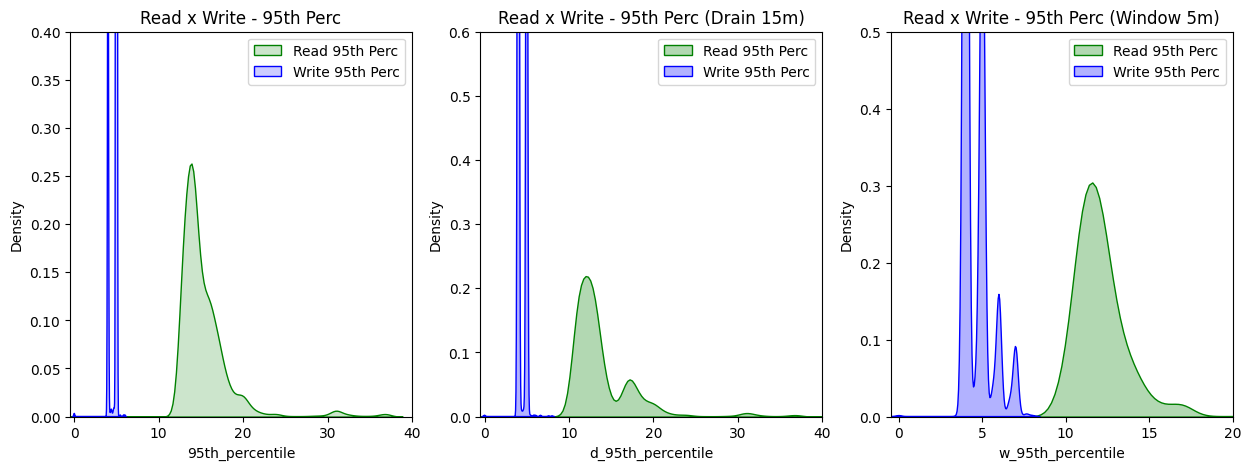

In [98]:
# 95th_percentile
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['95th_percentile'], color='green', fill=True, label='Read 95th Perc', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['95th_percentile'], color='b', fill=True, label='Write 95th Perc', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - 95th Perc")
axes[0].set_xlim(-0.5, 40)
axes[0].set_ylim(0, 0.4)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_95th_percentile'], color='green', fill=True, label='Read 95th Perc', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_95th_percentile'], color='b', fill=True, label='Write 95th Perc', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - 95th Perc (Drain 15m)")
axes[1].set_xlim(-0.5, 40)
axes[1].set_ylim(0, 0.6)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_95th_percentile'], color='green', fill=True, label='Read 95th Perc', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_95th_percentile'], color='b', fill=True, label='Write 95th Perc', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - 95th Perc (Window 5m)")
axes[2].set_xlim(-0.5, 20)
axes[2].set_ylim(0, 0.5)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_95th_percentile_mixed.png'))
plt.show()

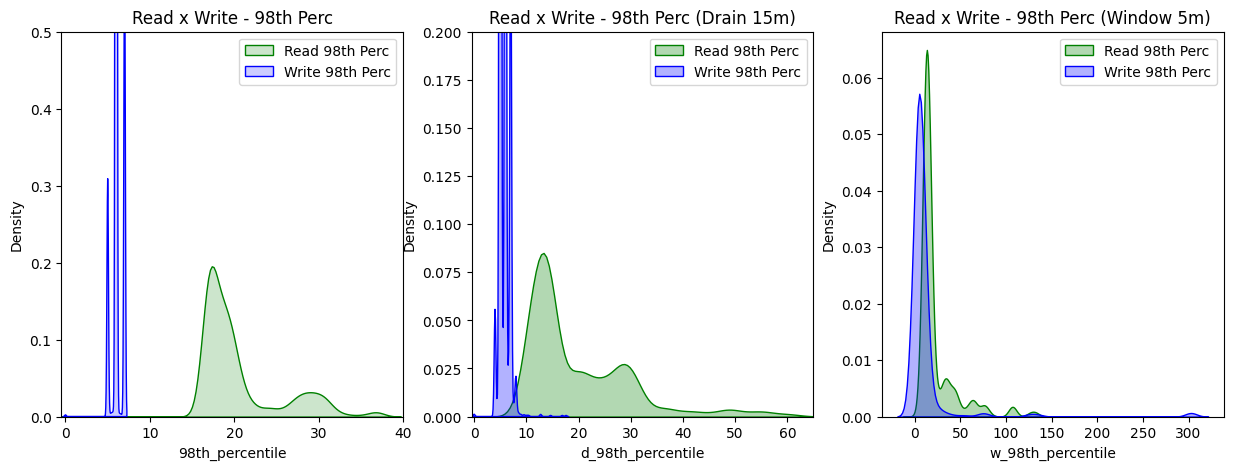

In [105]:
# 98th_percentile
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['98th_percentile'], color='green', fill=True, label='Read 98th Perc', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['98th_percentile'], color='b', fill=True, label='Write 98th Perc', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - 98th Perc")
axes[0].set_xlim(-0.5, 40)
axes[0].set_ylim(0, 0.5)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_98th_percentile'], color='green', fill=True, label='Read 98th Perc', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_98th_percentile'], color='b', fill=True, label='Write 98th Perc', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - 98th Perc (Drain 15m)")
axes[1].set_xlim(-0.5, 65)
axes[1].set_ylim(0, 0.20)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_98th_percentile'], color='green', fill=True, label='Read 98th Perc', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_98th_percentile'], color='b', fill=True, label='Write 98th Perc', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - 98th Perc (Window 5m)")
# axes[2].set_xlim(-0.5, 20)
# axes[2].set_ylim(0, 0.5)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_98th_percentile_mixed.png'))
plt.show()

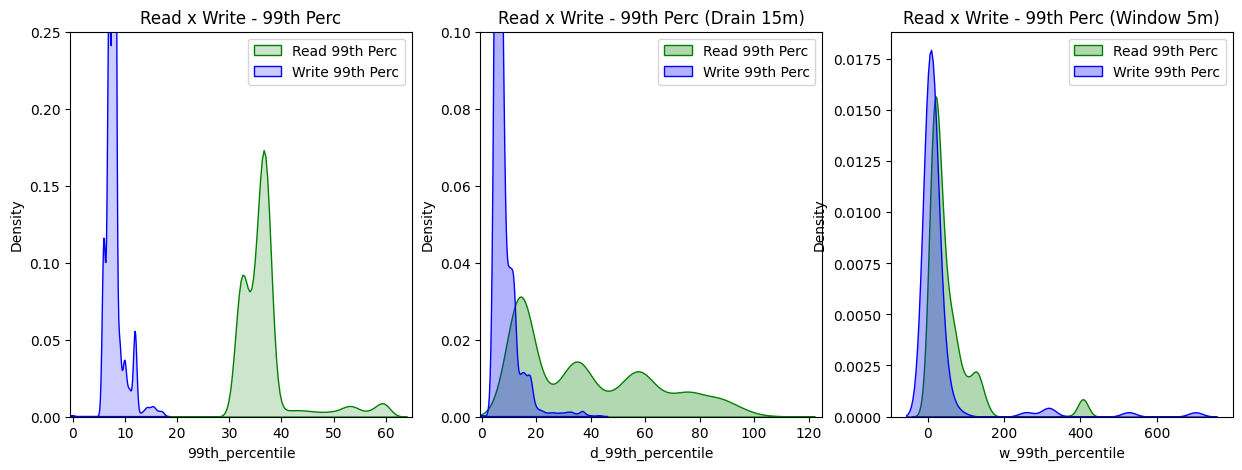

In [111]:
# 99th_percentile
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['99th_percentile'], color='green', fill=True, label='Read 99th Perc', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['99th_percentile'], color='b', fill=True, label='Write 99th Perc', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - 99th Perc")
axes[0].set_xlim(-0.5, 65)
axes[0].set_ylim(0, 0.25)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_99th_percentile'], color='green', fill=True, label='Read 99th Perc', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_99th_percentile'], color='b', fill=True, label='Write 99th Perc', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - 99th Perc (Drain 15m)")
axes[1].set_xlim(-0.5, 125)
axes[1].set_ylim(0, 0.10)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_99th_percentile'], color='green', fill=True, label='Read 99th Perc', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_99th_percentile'], color='b', fill=True, label='Write 99th Perc', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - 99th Perc (Window 5m)")
# axes[2].set_xlim(-0.5, 700)
# axes[2].set_ylim(0, 0.5)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_99th_percentile_mixed.png'))
plt.show()

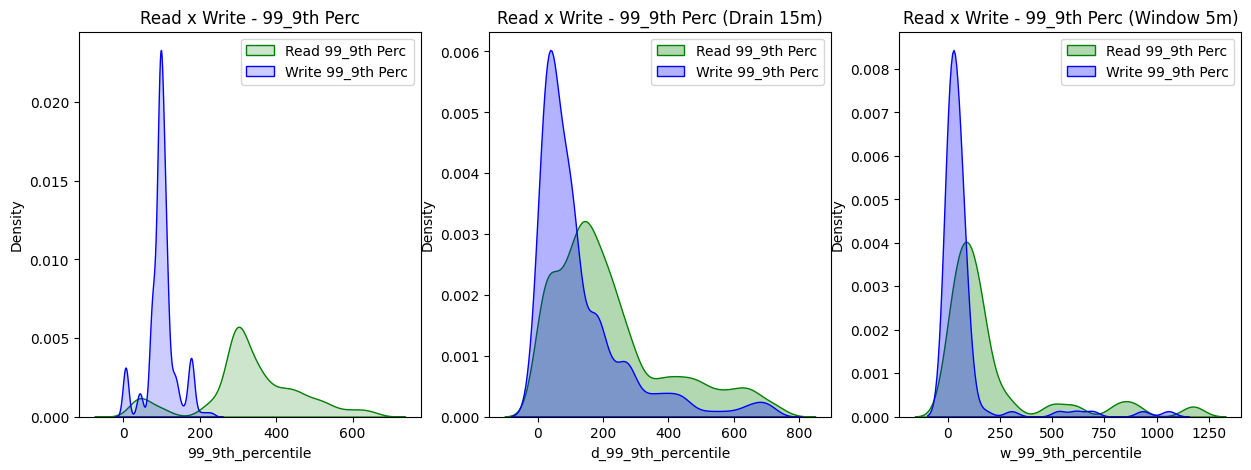

In [113]:
# 99_9th_percentile
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(dataset_read_raw['99_9th_percentile'], color='green', fill=True, label='Read 99_9th Perc', alpha=.2, ax=axes[0])
sns.kdeplot(dataset_write_raw['99_9th_percentile'], color='b', fill=True, label='Write 99_9th Perc', alpha=.2, ax=axes[0])
axes[0].set_title("Read x Write - 99_9th Perc")
# axes[0].set_xlim(-0.5, 65)
# axes[0].set_ylim(0, 0.25)
axes[0].legend()

sns.kdeplot(dataset_read_raw['d_99_9th_percentile'], color='green', fill=True, label='Read 99_9th Perc', alpha=.3, ax=axes[1])
sns.kdeplot(dataset_write_raw['d_99_9th_percentile'], color='b', fill=True, label='Write 99_9th Perc', alpha=.3, ax=axes[1])
axes[1].set_title("Read x Write - 99_9th Perc (Drain 15m)")
# axes[1].set_xlim(-0.5, 125)
# axes[1].set_ylim(0, 0.10)
axes[1].legend()

sns.kdeplot(dataset_read_raw['w_99_9th_percentile'], color='green', fill=True, label='Read 99_9th Perc', alpha=.3, ax=axes[2])
sns.kdeplot(dataset_write_raw['w_99_9th_percentile'], color='b', fill=True, label='Write 99_9th Perc', alpha=.3, ax=axes[2])
axes[2].set_title("Read x Write - 99_9th Perc (Window 5m)")
# axes[2].set_xlim(-0.5, 700)
# axes[2].set_ylim(0, 0.5)
axes[2].legend()

plt.savefig(os.path.join('images/exp_30c', 'read_write_metrics_snap_99_9th_percentile_mixed.png'))
plt.show()